In [1]:
#importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
import warnings
from matplotlib.lines import Line2D
from scipy.stats import norm
from datetime import datetime, timedelta
from matplotlib.ticker import FuncFormatter
warnings.filterwarnings('ignore')

In [2]:
# Load Dataset
df = pd.read_csv("D:/Ullas/MSc Data Analytics Capstone Project/Datasets/Passenger Journeys by Public Transport.csv")

In [3]:
# Preview
df.head()

STATISTIC     Statistic Label  TLIST(A1)  Year  C03935V04687  \
0  THA24C01  Passenger Journeys       2019  2019            10   
1  THA24C01  Passenger Journeys       2019  2019            10   
2  THA24C01  Passenger Journeys       2019  2019            10   
3  THA24C01  Passenger Journeys       2019  2019            10   
4  THA24C01  Passenger Journeys       2019  2019            10   

  Mode of Transport  C01198V01436 Weeks of the year    UNIT      VALUE  
0  Dublin Metro Bus             1           Week 01  Number  1987891.0  
1  Dublin Metro Bus             2           Week 02  Number  2709579.0  
2  Dublin Metro Bus             3           Week 03  Number  2784678.0  
3  Dublin Metro Bus             4           Week 04  Number  2858346.0  
4  Dublin Metro Bus             5           Week 05  Number  2924821.0

In [4]:
# removing the lines that have not been done in this year
df = df[:-27]

In [5]:
df.head()

STATISTIC     Statistic Label  TLIST(A1)  Year  C03935V04687  \
0  THA24C01  Passenger Journeys       2019  2019            10   
1  THA24C01  Passenger Journeys       2019  2019            10   
2  THA24C01  Passenger Journeys       2019  2019            10   
3  THA24C01  Passenger Journeys       2019  2019            10   
4  THA24C01  Passenger Journeys       2019  2019            10   

  Mode of Transport  C01198V01436 Weeks of the year    UNIT      VALUE  
0  Dublin Metro Bus             1           Week 01  Number  1987891.0  
1  Dublin Metro Bus             2           Week 02  Number  2709579.0  
2  Dublin Metro Bus             3           Week 03  Number  2784678.0  
3  Dublin Metro Bus             4           Week 04  Number  2858346.0  
4  Dublin Metro Bus             5           Week 05  Number  2924821.0

In [6]:
# Basic Statistics
print("Basic Statistics:")
print(df.describe())

Basic Statistics:
         TLIST(A1)         Year  C03935V04687  C01198V01436         VALUE
count  1033.000000  1033.000000   1033.000000   1033.000000  8.680000e+02
mean   2020.947725  2020.947725     24.607938     26.660213  1.665662e+06
std       1.395305     1.395305     11.061238     15.304396  1.367626e+06
min    2019.000000  2019.000000     10.000000      1.000000  2.323100e+04
25%    2020.000000  2020.000000     10.000000     13.000000  5.799855e+05
50%    2021.000000  2021.000000     20.000000     26.000000  9.101360e+05
75%    2022.000000  2022.000000     30.000000     40.000000  2.875604e+06
max    2023.000000  2023.000000     40.000000     53.000000  5.075079e+06


# Performing basic cleaning and setting up the dataset for further analysis

In [7]:
datasets = [df]

for data in datasets:
    print(data.info());

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1033 entries, 0 to 1032
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   STATISTIC          1033 non-null   object 
 1   Statistic Label    1033 non-null   object 
 2   TLIST(A1)          1033 non-null   int64  
 3   Year               1033 non-null   int64  
 4   C03935V04687       1033 non-null   int64  
 5   Mode of Transport  1033 non-null   object 
 6   C01198V01436       1033 non-null   int64  
 7   Weeks of the year  1033 non-null   object 
 8   UNIT               1033 non-null   object 
 9   VALUE              868 non-null    float64
dtypes: float64(1), int64(4), object(5)
memory usage: 80.8+ KB
None


In [8]:
# Renaming columns
df.rename(columns={'Weeks of the year': 'Weeks', 'VALUE': 'Demand'}, inplace=True)

In [9]:
df.head()

STATISTIC     Statistic Label  TLIST(A1)  Year  C03935V04687  \
0  THA24C01  Passenger Journeys       2019  2019            10   
1  THA24C01  Passenger Journeys       2019  2019            10   
2  THA24C01  Passenger Journeys       2019  2019            10   
3  THA24C01  Passenger Journeys       2019  2019            10   
4  THA24C01  Passenger Journeys       2019  2019            10   

  Mode of Transport  C01198V01436    Weeks    UNIT     Demand  
0  Dublin Metro Bus             1  Week 01  Number  1987891.0  
1  Dublin Metro Bus             2  Week 02  Number  2709579.0  
2  Dublin Metro Bus             3  Week 03  Number  2784678.0  
3  Dublin Metro Bus             4  Week 04  Number  2858346.0  
4  Dublin Metro Bus             5  Week 05  Number  2924821.0

In [10]:
df.drop(['STATISTIC','TLIST(A1)','UNIT'], axis = 1, inplace = True)

In [11]:
df.head()

Statistic Label  Year  C03935V04687 Mode of Transport  C01198V01436  \
0  Passenger Journeys  2019            10  Dublin Metro Bus             1   
1  Passenger Journeys  2019            10  Dublin Metro Bus             2   
2  Passenger Journeys  2019            10  Dublin Metro Bus             3   
3  Passenger Journeys  2019            10  Dublin Metro Bus             4   
4  Passenger Journeys  2019            10  Dublin Metro Bus             5   

     Weeks     Demand  
0  Week 01  1987891.0  
1  Week 02  2709579.0  
2  Week 03  2784678.0  
3  Week 04  2858346.0  
4  Week 05  2924821.0

In [12]:
#converting year and weeks columns to date column 
df['Date'] = df['Year'].astype(str) + '-W' + df['Weeks'].str.slice(start=5).astype(int).apply(lambda x: f'{x:02}')
df['Date'] = pd.to_datetime(df['Date'] + '-1', format='%Y-W%U-%w')
df['Date'] = df['Date'].dt.strftime('%d/%m/%Y')

In [13]:
df.head()

Statistic Label  Year  C03935V04687 Mode of Transport  C01198V01436  \
0  Passenger Journeys  2019            10  Dublin Metro Bus             1   
1  Passenger Journeys  2019            10  Dublin Metro Bus             2   
2  Passenger Journeys  2019            10  Dublin Metro Bus             3   
3  Passenger Journeys  2019            10  Dublin Metro Bus             4   
4  Passenger Journeys  2019            10  Dublin Metro Bus             5   

     Weeks     Demand        Date  
0  Week 01  1987891.0  07/01/2019  
1  Week 02  2709579.0  14/01/2019  
2  Week 03  2784678.0  21/01/2019  
3  Week 04  2858346.0  28/01/2019  
4  Week 05  2924821.0  04/02/2019

In [14]:
df.columns

Index(['Statistic Label', 'Year', 'C03935V04687', 'Mode of Transport',
       'C01198V01436', 'Weeks', 'Demand', 'Date'],
      dtype='object')

In [15]:
desired_order = ['Year', 'Weeks', 'Date', 'Mode of Transport', 'Statistic Label', 'Demand', 'C03935V04687', 'C01198V01436']

In [16]:
df = df.reindex(columns=desired_order)

In [17]:
df.head()

Year    Weeks        Date Mode of Transport     Statistic Label     Demand  \
0  2019  Week 01  07/01/2019  Dublin Metro Bus  Passenger Journeys  1987891.0   
1  2019  Week 02  14/01/2019  Dublin Metro Bus  Passenger Journeys  2709579.0   
2  2019  Week 03  21/01/2019  Dublin Metro Bus  Passenger Journeys  2784678.0   
3  2019  Week 04  28/01/2019  Dublin Metro Bus  Passenger Journeys  2858346.0   
4  2019  Week 05  04/02/2019  Dublin Metro Bus  Passenger Journeys  2924821.0   

   C03935V04687  C01198V01436  
0            10             1  
1            10             2  
2            10             3  
3            10             4  
4            10             5

In [18]:
#Dealing with the missing values on the dataset
df.interpolate(method='linear', inplace=True)

In [19]:
#formating the Deamnd column to make it more simpler 
df['Demand'] = df['Demand'].apply(lambda x: "{:,.0f}".format(x))

In [20]:
datasets = [df]

for data in datasets:
    print(data.shape)

(1033, 8)


In [21]:
datasets = [df]

for data in datasets:
    print(data.info());

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1033 entries, 0 to 1032
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Year               1033 non-null   int64 
 1   Weeks              1033 non-null   object
 2   Date               1033 non-null   object
 3   Mode of Transport  1033 non-null   object
 4   Statistic Label    1033 non-null   object
 5   Demand             1033 non-null   object
 6   C03935V04687       1033 non-null   int64 
 7   C01198V01436       1033 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 64.7+ KB
None


In [22]:
df.head(1060)

Year    Weeks        Date                     Mode of Transport  \
0     2019  Week 01  07/01/2019                      Dublin Metro Bus   
1     2019  Week 02  14/01/2019                      Dublin Metro Bus   
2     2019  Week 03  21/01/2019                      Dublin Metro Bus   
3     2019  Week 04  28/01/2019                      Dublin Metro Bus   
4     2019  Week 05  04/02/2019                      Dublin Metro Bus   
...    ...      ...         ...                                   ...   
1028  2023  Week 22  29/05/2023  All public transport, excluding LUAS   
1029  2023  Week 23  05/06/2023  All public transport, excluding LUAS   
1030  2023  Week 24  12/06/2023  All public transport, excluding LUAS   
1031  2023  Week 25  19/06/2023  All public transport, excluding LUAS   
1032  2023  Week 26  26/06/2023  All public transport, excluding LUAS   

         Statistic Label     Demand  C03935V04687  C01198V01436  
0     Passenger Journeys  1,987,891            10             1  
1     Passenger Journeys  2,709,579            10             2  
2     Passenger Journeys  2,784,678            10             3  
3     Passenger Journeys  2,858,346            10             4  
4     Passenger Journeys  2,924,821            10             5  
...                  ...        ...           ...           ...  
1028  Passenger Journeys  4,933,448            40            22  
1029  Passenger Journeys  4,933,448            40            23  
1030  Passenger Journeys  4,933,448            40            24  
1031  Passenger Journeys  4,933,448            40            25  
1032  Passenger Journeys  4,933,448            40            26  

[1033 rows x 8 columns]

In [23]:
# remove commas on Demand
df['Demand'] = df['Demand'].str.replace(',', '').astype(int)
# Convert Date column to datetime
df['Date'] = pd.to_datetime(df['Date'])

In [24]:
df.head()

Year    Weeks       Date Mode of Transport     Statistic Label   Demand  \
0  2019  Week 01 2019-07-01  Dublin Metro Bus  Passenger Journeys  1987891   
1  2019  Week 02 2019-01-14  Dublin Metro Bus  Passenger Journeys  2709579   
2  2019  Week 03 2019-01-21  Dublin Metro Bus  Passenger Journeys  2784678   
3  2019  Week 04 2019-01-28  Dublin Metro Bus  Passenger Journeys  2858346   
4  2019  Week 05 2019-04-02  Dublin Metro Bus  Passenger Journeys  2924821   

   C03935V04687  C01198V01436  
0            10             1  
1            10             2  
2            10             3  
3            10             4  
4            10             5

In [25]:
df.columns

Index(['Year', 'Weeks', 'Date', 'Mode of Transport', 'Statistic Label',
       'Demand', 'C03935V04687', 'C01198V01436'],
      dtype='object')

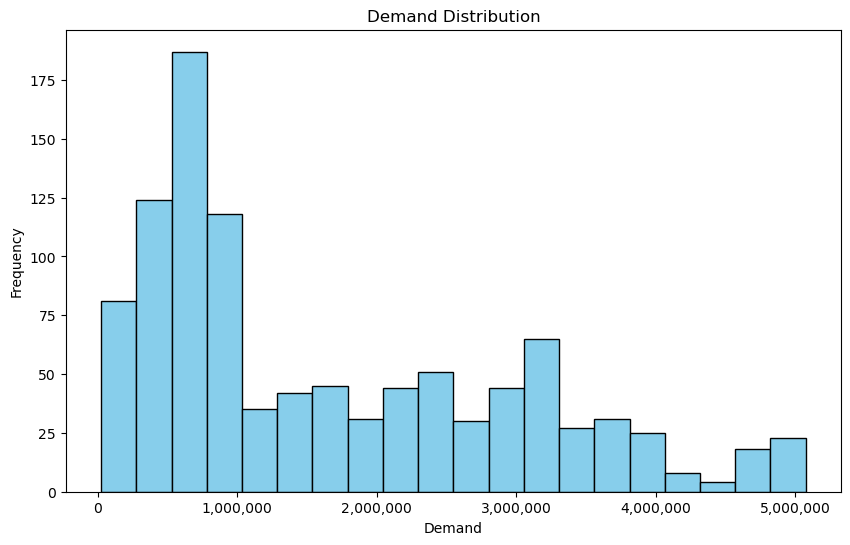

In [26]:
# Plotting a histogram on Demand
plt.figure(figsize=(10, 6))
plt.hist(df['Demand'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Demand')
plt.ylabel('Frequency')
plt.title('Demand Distribution')
plt.gca().get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, _: format(int(x), ',')))
plt.show()

In [27]:
# Create an animated scatter plot
end_date = '2023-06-26'
filtered_df = df[df['Date'] <= end_date]
fig = px.scatter(filtered_df, x='Date', y='Demand', size='Demand', color='Mode of Transport',
                 animation_frame='Mode of Transport', title='Demand by Mode of Transport over Time')
fig.show()

In [28]:
# Plotting a interactive line plot
end_date = '2023-06-26'
filtered_df = df[df['Date'] <= end_date]
fig = px.line(filtered_df, x='Date', y='Demand', color='Mode of Transport', title='Demand by Mode of Transport over Time')
fig.update_layout(width=900, height=600)
fig.show()

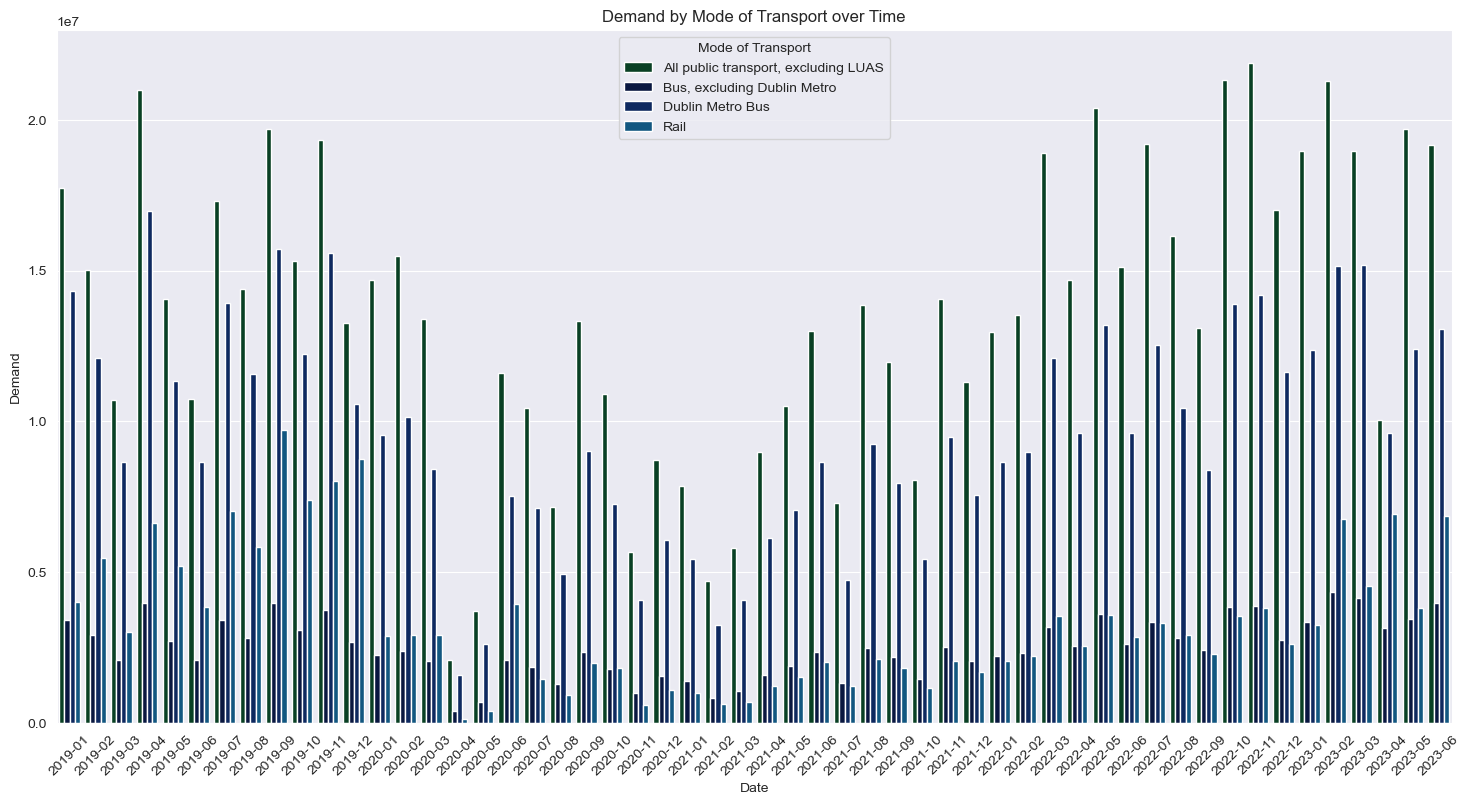

In [29]:
df['Date'] = pd.to_datetime(df['Date'])
aggregated_df = filtered_df.groupby([filtered_df['Date'].dt.to_period('M'), 'Mode of Transport'])['Demand'].sum().reset_index()
sns.set_style('darkgrid')
sns.set_palette('ocean')
plt.figure(figsize=(18, 9))
plot = sns.barplot(x='Date', y='Demand', hue='Mode of Transport', data=aggregated_df)
plot.set_title('Demand by Mode of Transport over Time')
plot.set_xlabel('Date')
plot.set_ylabel('Demand')
plt.xticks(rotation=45) 
plt.legend(title='Mode of Transport')  
plt.show()

# Statistical analysis

In [30]:
statistics = df['Demand'].describe()
print(statistics)

count    1.033000e+03
mean     1.660563e+06
std      1.312684e+06
min      2.323100e+04
25%      6.268890e+05
50%      1.070818e+06
75%      2.723661e+06
max      5.075079e+06
Name: Demand, dtype: float64


In [31]:
mean = df['Demand'].mean()
print(mean)

1660563.0764762827


In [32]:
median = df['Demand'].median()
print(median)

1070818.0


In [33]:
mode = df['Demand'].mode()
print(mode)

0    4933448
Name: Demand, dtype: int32


In [34]:
variance = df['Demand'].var()
print(variance)

1723139789229.1926


In [35]:
std_dev = df['Demand'].std()
print(std_dev)

1312684.1924961207


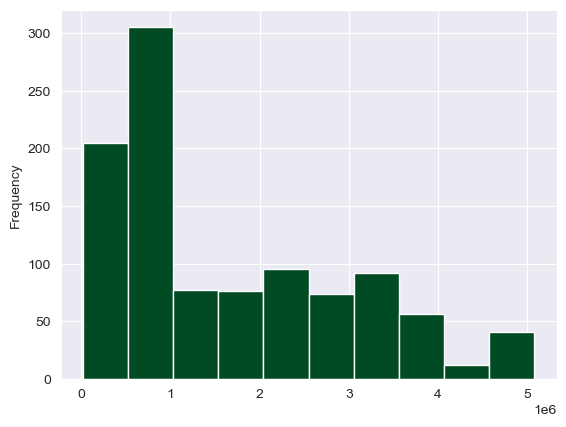

In [36]:
df['Demand'].plot(kind='hist')
plt.show()

# Normal Distribution

In [37]:
from scipy.stats import norm
mean = df['Demand'].mean()
std_dev = df['Demand'].std()
normal_distribution = norm.pdf(mean, std_dev)

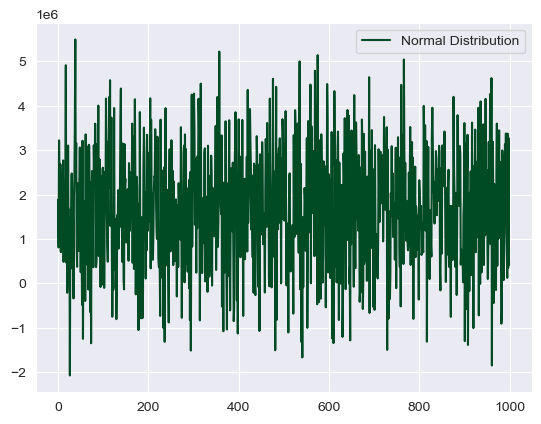

In [38]:
from scipy.stats import norm
mean = df['Demand'].mean()
std_dev = df['Demand'].std()
samples = norm.rvs(mean, std_dev, size=1000)
plt.plot(samples, label='Normal Distribution')
plt.legend()
plt.show()

# Poisson Distribution

In [39]:
from scipy.stats import poisson
mean = df['Demand'].mean()
poisson_distribution = poisson.pmf(mean, mean)

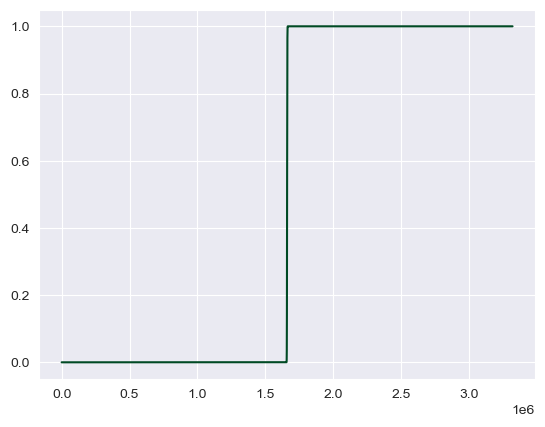

In [40]:
mean = df['Demand'].mean()
poisson_distribution = poisson.cdf(range(int(mean*2)), mean)
plt.plot(poisson_distribution)
plt.show()

# Starting with comparitive analysis and all main functions

In [41]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score

In [42]:
# Load datasets
demand_data = pd.read_csv("D:/Ullas/MSc Data Analytics Capstone Project/Datasets/Passenger Journeys by Public Transport.csv")
demographic_data = pd.read_csv("D:/Ullas/MSc Data Analytics Capstone Project/Datasets/Demographic.csv")
weather_data = pd.read_csv("D:/Ullas/MSc Data Analytics Capstone Project/Datasets/weather.csv")

In [43]:
demand_data.head()

STATISTIC     Statistic Label  TLIST(A1)  Year  C03935V04687  \
0  THA24C01  Passenger Journeys       2019  2019            10   
1  THA24C01  Passenger Journeys       2019  2019            10   
2  THA24C01  Passenger Journeys       2019  2019            10   
3  THA24C01  Passenger Journeys       2019  2019            10   
4  THA24C01  Passenger Journeys       2019  2019            10   

  Mode of Transport  C01198V01436 Weeks of the year    UNIT      VALUE  
0  Dublin Metro Bus             1           Week 01  Number  1987891.0  
1  Dublin Metro Bus             2           Week 02  Number  2709579.0  
2  Dublin Metro Bus             3           Week 03  Number  2784678.0  
3  Dublin Metro Bus             4           Week 04  Number  2858346.0  
4  Dublin Metro Bus             5           Week 05  Number  2924821.0

In [44]:
demographic_data.head()

STATISTIC                                    Statistic Label  TLIST(A1)  \
0  NTA105C01  Frequency of use of bus services - Weekly or m...       2021   
1  NTA105C01  Frequency of use of bus services - Weekly or m...       2021   
2  NTA105C01  Frequency of use of bus services - Weekly or m...       2021   
3  NTA105C01  Frequency of use of bus services - Weekly or m...       2021   
4  NTA105C01  Frequency of use of bus services - Weekly or m...       2021   

   Year  C02199V02655   Sex  C02076V02508      Age Group UNIT  VALUE  
0  2021             1  Male           350  18 - 24 years    %    NaN  
1  2021             1  Male           415  25 - 34 years    %   19.0  
2  2021             1  Male           465  35 - 44 years    %   10.0  
3  2021             1  Male           500  45 - 54 years    %    9.0  
4  2021             1  Male           535  55 - 64 years    %    7.0

In [45]:
weather_data.head()

date  ind  rain ind.1 maxt ind.2 mint gmin soil
0  01-Jan-41    0   2.4                                
1  02-Jan-41    0   0.9                                
2  03-Jan-41    0   0.0                                
3  04-Jan-41    0   0.0                                
4  05-Jan-41    0   0.0

In [46]:
# Displaying basic information about the datasets
print("Demand Data Info:")
print(demand_data.info())

print("\nDemographic Data Info:")
print(demographic_data.info())

print("\nWeather Data Info:")
print(weather_data.info())

# Summary statistics
print("\nDemand Data Summary Statistics:")
print(demand_data.describe())

print("\nDemographic Data Summary Statistics:")
print(demographic_data.describe())

print("\nWeather Data Summary Statistics:")
print(weather_data.describe())

Demand Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1060 entries, 0 to 1059
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   STATISTIC          1060 non-null   object 
 1   Statistic Label    1060 non-null   object 
 2   TLIST(A1)          1060 non-null   int64  
 3   Year               1060 non-null   int64  
 4   C03935V04687       1060 non-null   int64  
 5   Mode of Transport  1060 non-null   object 
 6   C01198V01436       1060 non-null   int64  
 7   Weeks of the year  1060 non-null   object 
 8   UNIT               1060 non-null   object 
 9   VALUE              868 non-null    float64
dtypes: float64(1), int64(4), object(5)
memory usage: 82.9+ KB
None

Demographic Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   STATI

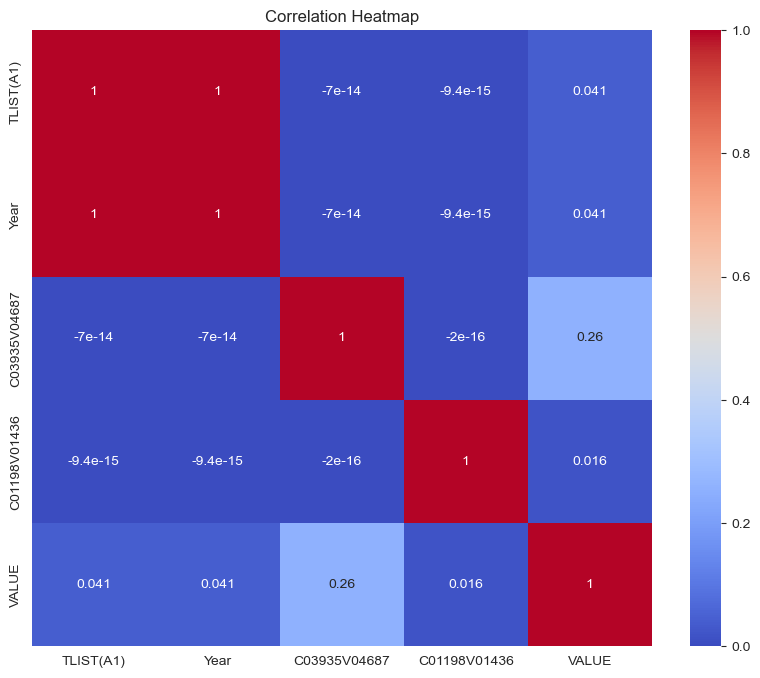

In [47]:
# heatmap
correlation_matrix = demand_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

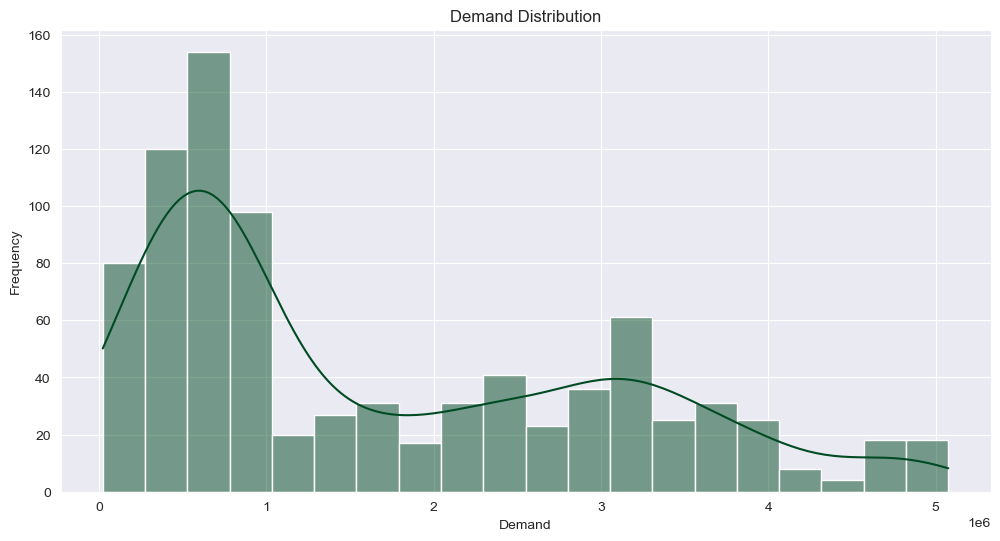

In [48]:
# Distribution plots
plt.figure(figsize=(12, 6))
sns.histplot(demand_data['VALUE'], bins=20, kde=True)
plt.title("Demand Distribution")
plt.xlabel("Demand")
plt.ylabel("Frequency")
plt.show()

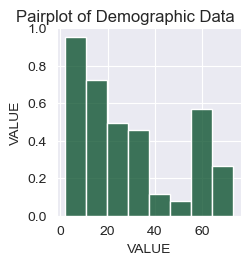

In [49]:
# Pairplot for selected features
sns.pairplot(demographic_data[['Statistic Label', 'Age Group','Sex','VALUE']])
plt.suptitle("Pairplot of Demographic Data", y=1.02)
plt.show()

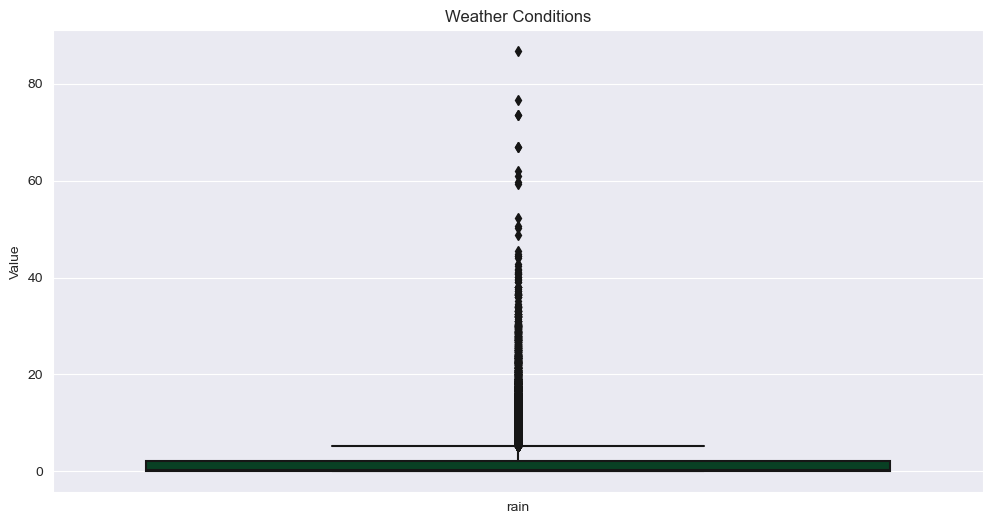

In [50]:
# Boxplot for weather conditions
plt.figure(figsize=(12, 6))
sns.boxplot(data=weather_data[['date', 'rain', 'maxt']])
plt.title("Weather Conditions")
plt.ylabel("Value")
plt.show()

In [51]:
demand_data.columns

Index(['STATISTIC', 'Statistic Label', 'TLIST(A1)', 'Year', 'C03935V04687',
       'Mode of Transport', 'C01198V01436', 'Weeks of the year', 'UNIT',
       'VALUE'],
      dtype='object')

In [52]:
demographic_data.columns

Index(['STATISTIC', 'Statistic Label', 'TLIST(A1)', 'Year', 'C02199V02655',
       'Sex', 'C02076V02508', 'Age Group', 'UNIT', 'VALUE'],
      dtype='object')

In [53]:
weather_data.columns

Index(['date', 'ind', 'rain', 'ind.1', 'maxt', 'ind.2', 'mint', 'gmin',
       'soil'],
      dtype='object')

# Preparing the first dataset: demand_data

In [54]:
# Renaming columns
demand_data.rename(columns={'Weeks of the year': 'Weeks', 'VALUE': 'Demand'}, inplace=True)

In [55]:
demand_data.drop(['STATISTIC','TLIST(A1)','UNIT'], axis = 1, inplace = True)

In [56]:
#converting year and weeks columns to date column 
demand_data['Date'] = demand_data['Year'].astype(str) + '-W' + demand_data['Weeks'].str.slice(start=5).astype(int).apply(lambda x: f'{x:02}')
demand_data['Date'] = pd.to_datetime(demand_data['Date'] + '-1', format='%Y-W%U-%w')
demand_data['Date'] = demand_data['Date'].dt.strftime('%d/%m/%Y')

In [57]:
desired_order = ['Year', 'Weeks', 'Date', 'Mode of Transport', 'Statistic Label', 'Demand', 'C03935V04687', 'C01198V01436']

demand_data = demand_data.reindex(columns=desired_order)

#Dealing with the missing values on the dataset
demand_data.interpolate(method='linear', inplace=True)

#formating the Deamnd column to make it more simpler 
demand_data['Demand'] = demand_data['Demand'].apply(lambda x: "{:,.0f}".format(x))

# remove commas on Demand
demand_data['Demand'] = demand_data['Demand'].str.replace(',', '').astype(int)
# Convert Date column to datetime
demand_data['Date'] = pd.to_datetime(demand_data['Date'])

In [58]:
demand_data.drop(['C03935V04687','C01198V01436'], axis = 1, inplace = True)

In [59]:
demand_data.columns

Index(['Year', 'Weeks', 'Date', 'Mode of Transport', 'Statistic Label',
       'Demand'],
      dtype='object')

In [60]:
demand_data.head()

Year    Weeks       Date Mode of Transport     Statistic Label   Demand
0  2019  Week 01 2019-07-01  Dublin Metro Bus  Passenger Journeys  1987891
1  2019  Week 02 2019-01-14  Dublin Metro Bus  Passenger Journeys  2709579
2  2019  Week 03 2019-01-21  Dublin Metro Bus  Passenger Journeys  2784678
3  2019  Week 04 2019-01-28  Dublin Metro Bus  Passenger Journeys  2858346
4  2019  Week 05 2019-04-02  Dublin Metro Bus  Passenger Journeys  2924821

In [61]:
demand_data = demand_data[demand_data['Year'] == 2021]

In [62]:
demand_data.head()

Year    Weeks       Date Mode of Transport     Statistic Label  Demand
424  2021  Week 01 2021-04-01  Dublin Metro Bus  Passenger Journeys  747912
425  2021  Week 02 2021-11-01  Dublin Metro Bus  Passenger Journeys  735000
426  2021  Week 03 2021-01-18  Dublin Metro Bus  Passenger Journeys  731273
427  2021  Week 04 2021-01-25  Dublin Metro Bus  Passenger Journeys  742813
428  2021  Week 05 2021-01-02  Dublin Metro Bus  Passenger Journeys  791189

In [63]:
total_lines = len(demand_data)
print("Total lines of data:", total_lines)

Total lines of data: 212


# Preparing the second dataset: demographic_data

In [64]:
demographic_data.head()

STATISTIC                                    Statistic Label  TLIST(A1)  \
0  NTA105C01  Frequency of use of bus services - Weekly or m...       2021   
1  NTA105C01  Frequency of use of bus services - Weekly or m...       2021   
2  NTA105C01  Frequency of use of bus services - Weekly or m...       2021   
3  NTA105C01  Frequency of use of bus services - Weekly or m...       2021   
4  NTA105C01  Frequency of use of bus services - Weekly or m...       2021   

   Year  C02199V02655   Sex  C02076V02508      Age Group UNIT  VALUE  
0  2021             1  Male           350  18 - 24 years    %    NaN  
1  2021             1  Male           415  25 - 34 years    %   19.0  
2  2021             1  Male           465  35 - 44 years    %   10.0  
3  2021             1  Male           500  45 - 54 years    %    9.0  
4  2021             1  Male           535  55 - 64 years    %    7.0

In [65]:
# Renaming columns
demographic_data.rename(columns={'VALUE': 'Demand %'}, inplace=True)

In [66]:
demographic_data.drop(['STATISTIC','TLIST(A1)','C02199V02655','C02076V02508','UNIT'], axis = 1, inplace = True)

In [67]:
demographic_data.head()

Statistic Label  Year   Sex  \
0  Frequency of use of bus services - Weekly or m...  2021  Male   
1  Frequency of use of bus services - Weekly or m...  2021  Male   
2  Frequency of use of bus services - Weekly or m...  2021  Male   
3  Frequency of use of bus services - Weekly or m...  2021  Male   
4  Frequency of use of bus services - Weekly or m...  2021  Male   

       Age Group  Demand %  
0  18 - 24 years       NaN  
1  25 - 34 years      19.0  
2  35 - 44 years      10.0  
3  45 - 54 years       9.0  
4  55 - 64 years       7.0

In [68]:
mean_value = demographic_data['Demand %'].mean()
demographic_data['Demand %'].fillna(mean_value, inplace=True)

In [69]:
# Forward fill and Backward fill
demographic_data.fillna(method='ffill', inplace=True)  
demographic_data.fillna(method='bfill', inplace=True)  

In [70]:
demographic_data.interpolate(method='linear', inplace=True)

In [71]:
demographic_data.head()

Statistic Label  Year   Sex  \
0  Frequency of use of bus services - Weekly or m...  2021  Male   
1  Frequency of use of bus services - Weekly or m...  2021  Male   
2  Frequency of use of bus services - Weekly or m...  2021  Male   
3  Frequency of use of bus services - Weekly or m...  2021  Male   
4  Frequency of use of bus services - Weekly or m...  2021  Male   

       Age Group  Demand %  
0  18 - 24 years  28.59375  
1  25 - 34 years  19.00000  
2  35 - 44 years  10.00000  
3  45 - 54 years   9.00000  
4  55 - 64 years   7.00000

In [72]:
demographic_data.columns

Index(['Statistic Label', 'Year', 'Sex', 'Age Group', 'Demand %'], dtype='object')

In [73]:
total_lines = len(demographic_data)
print("Total lines of data:", total_lines)

Total lines of data: 112


# Preparing the Third dataset: weather_data

In [74]:
weather_data.head()

date  ind  rain ind.1 maxt ind.2 mint gmin soil
0  01-Jan-41    0   2.4                                
1  02-Jan-41    0   0.9                                
2  03-Jan-41    0   0.0                                
3  04-Jan-41    0   0.0                                
4  05-Jan-41    0   0.0

In [75]:
# Renaming columns
weather_data.rename(columns={'ind': 'Indicator', 'rain': 'Rain','maxt':'Temperature(c)','soil':'Soil'}, inplace=True)

In [76]:
weather_data.drop(['ind.1','ind.2','mint','gmin'], axis = 1, inplace = True)

In [77]:
weather_data.columns

Index(['date', 'Indicator', 'Rain', 'Temperature(c)', 'Soil'], dtype='object')

In [78]:
# Converting date column to datetime format
weather_data['date'] = pd.to_datetime(weather_data['date'], format='%d-%b-%y')
# Only taking data of year 2021
weather_data = weather_data[weather_data['date'].dt.year == 2021]

In [79]:
weather_data.head()

date  Indicator  Rain Temperature(c) Soil
37158 2021-01-01          0   0.4            6.1     
37159 2021-01-02          4   0.0            4.5     
37160 2021-01-03          0   4.4              7     
37161 2021-01-04          0   1.0            6.6     
37162 2021-01-05          0   4.9            5.6

In [80]:
total_lines = len(weather_data)
print("Total lines of data:", total_lines)

Total lines of data: 365


In [81]:
# filling with values on Soil column 
random_soil_values = np.random.rand(len(weather_data)) * 10 
weather_data['Soil'] = random_soil_values

In [82]:
# filling missing values
weather_data['Rain'].interpolate(method='linear', inplace=True)
weather_data['Temperature(c)'].fillna(method='ffill', inplace=True)

In [83]:
weather_data.head()

date  Indicator  Rain Temperature(c)      Soil
37158 2021-01-01          0   0.4            6.1  4.335267
37159 2021-01-02          4   0.0            4.5  0.705191
37160 2021-01-03          0   4.4              7  8.646481
37161 2021-01-04          0   1.0            6.6  1.644515
37162 2021-01-05          0   4.9            5.6  8.942984

In [84]:
weather_data.columns

Index(['date', 'Indicator', 'Rain', 'Temperature(c)', 'Soil'], dtype='object')

In [85]:
weather_data.head()

date  Indicator  Rain Temperature(c)      Soil
37158 2021-01-01          0   0.4            6.1  4.335267
37159 2021-01-02          4   0.0            4.5  0.705191
37160 2021-01-03          0   4.4              7  8.646481
37161 2021-01-04          0   1.0            6.6  1.644515
37162 2021-01-05          0   4.9            5.6  8.942984

# Visulisation for the first dataset:demand_data

In [86]:
demand_data.head()

Year    Weeks       Date Mode of Transport     Statistic Label  Demand
424  2021  Week 01 2021-04-01  Dublin Metro Bus  Passenger Journeys  747912
425  2021  Week 02 2021-11-01  Dublin Metro Bus  Passenger Journeys  735000
426  2021  Week 03 2021-01-18  Dublin Metro Bus  Passenger Journeys  731273
427  2021  Week 04 2021-01-25  Dublin Metro Bus  Passenger Journeys  742813
428  2021  Week 05 2021-01-02  Dublin Metro Bus  Passenger Journeys  791189

In [87]:
demand_data['Date'] = pd.to_datetime(demand_data['Date'])

In [88]:
demand_data.set_index('Date', inplace=True)

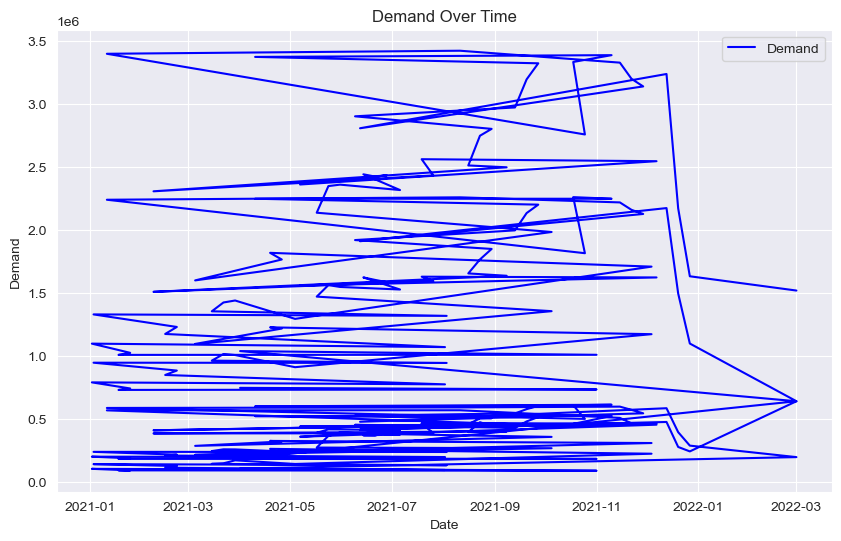

In [89]:
# Plotting demand over time
plt.figure(figsize=(10, 6))
plt.plot(demand_data['Demand'], label='Demand', color='blue')
plt.xlabel('Date')
plt.ylabel('Demand')
plt.title('Demand Over Time')
plt.legend()
plt.grid(True)
plt.show()

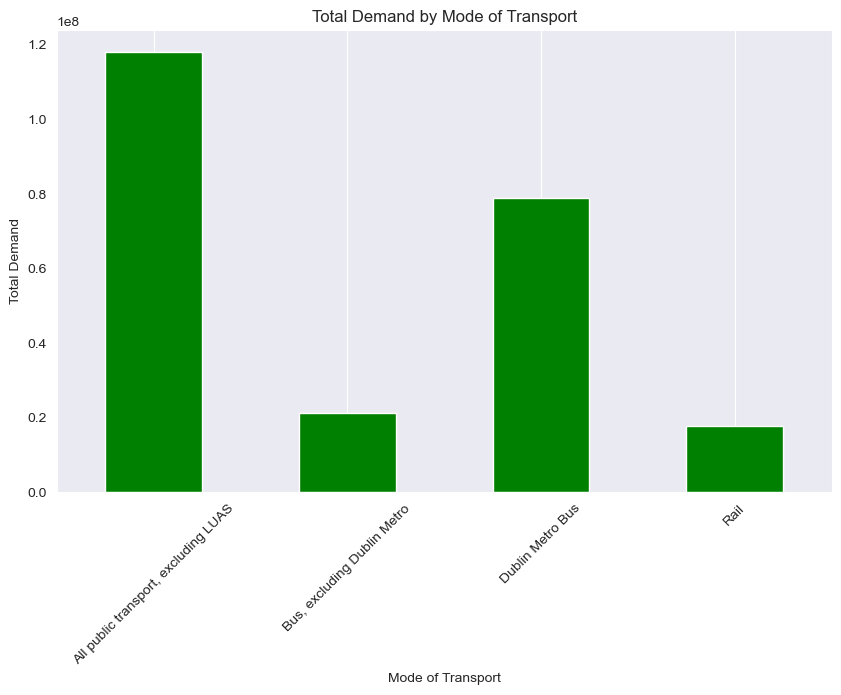

In [90]:
# Plotting demand distribution by mode of transport
plt.figure(figsize=(10, 6))
demand_data.groupby('Mode of Transport')['Demand'].sum().plot(kind='bar', color='green')
plt.xlabel('Mode of Transport')
plt.ylabel('Total Demand')
plt.title('Total Demand by Mode of Transport')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

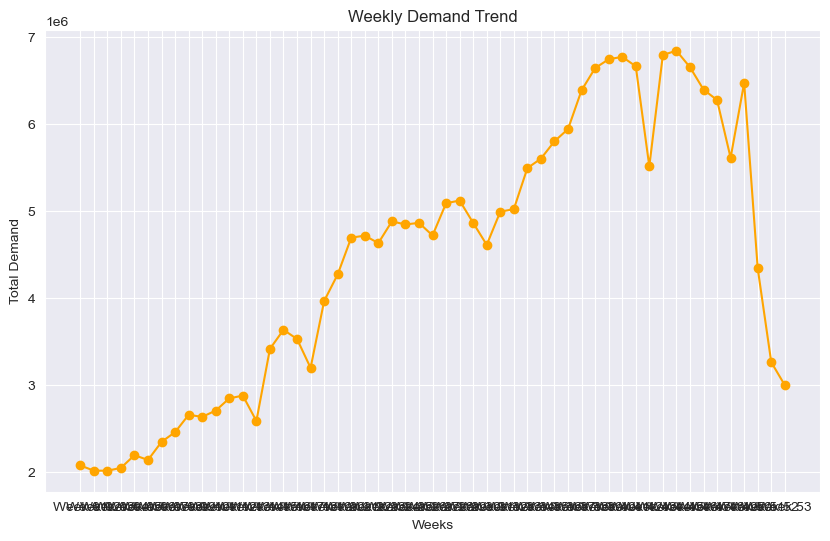

In [91]:
# Plotting demand trend by weeks
weekly_demand = demand_data.groupby('Weeks')['Demand'].sum()
plt.figure(figsize=(10, 6))
plt.plot(weekly_demand, marker='o', color='orange')
plt.xlabel('Weeks')
plt.ylabel('Total Demand')
plt.title('Weekly Demand Trend')
plt.grid(True)
plt.show()

# Visulisation for the second dataset:demographic_data

In [92]:
demographic_data.head()

Statistic Label  Year   Sex  \
0  Frequency of use of bus services - Weekly or m...  2021  Male   
1  Frequency of use of bus services - Weekly or m...  2021  Male   
2  Frequency of use of bus services - Weekly or m...  2021  Male   
3  Frequency of use of bus services - Weekly or m...  2021  Male   
4  Frequency of use of bus services - Weekly or m...  2021  Male   

       Age Group  Demand %  
0  18 - 24 years  28.59375  
1  25 - 34 years  19.00000  
2  35 - 44 years  10.00000  
3  45 - 54 years   9.00000  
4  55 - 64 years   7.00000

In [93]:
demographic_data.head()

Statistic Label  Year   Sex  \
0  Frequency of use of bus services - Weekly or m...  2021  Male   
1  Frequency of use of bus services - Weekly or m...  2021  Male   
2  Frequency of use of bus services - Weekly or m...  2021  Male   
3  Frequency of use of bus services - Weekly or m...  2021  Male   
4  Frequency of use of bus services - Weekly or m...  2021  Male   

       Age Group  Demand %  
0  18 - 24 years  28.59375  
1  25 - 34 years  19.00000  
2  35 - 44 years  10.00000  
3  45 - 54 years   9.00000  
4  55 - 64 years   7.00000

In [94]:
demographic_data.set_index('Year', inplace=True)

In [95]:
demographic_data.head()

Statistic Label   Sex      Age Group  \
Year                                                                           
2021  Frequency of use of bus services - Weekly or m...  Male  18 - 24 years   
2021  Frequency of use of bus services - Weekly or m...  Male  25 - 34 years   
2021  Frequency of use of bus services - Weekly or m...  Male  35 - 44 years   
2021  Frequency of use of bus services - Weekly or m...  Male  45 - 54 years   
2021  Frequency of use of bus services - Weekly or m...  Male  55 - 64 years   

      Demand %  
Year            
2021  28.59375  
2021  19.00000  
2021  10.00000  
2021   9.00000  
2021   7.00000

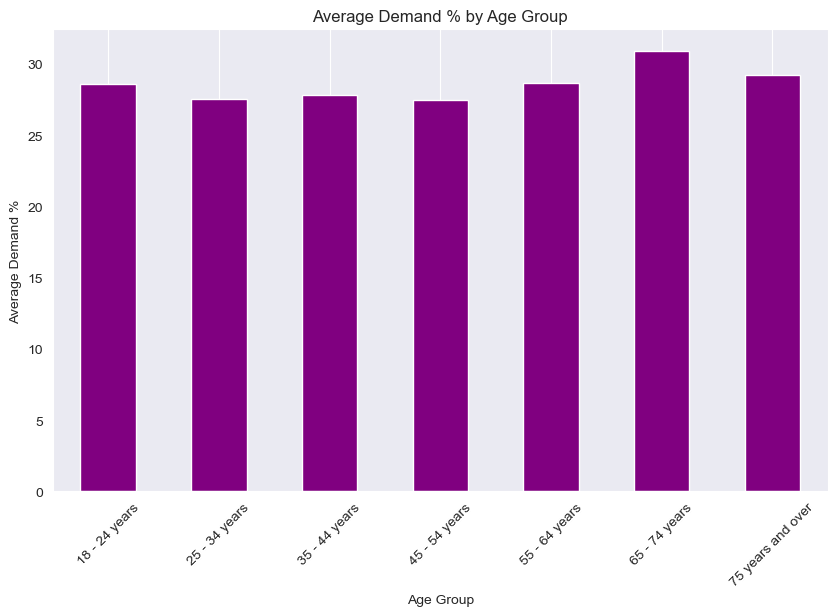

In [96]:
# Plotting Age Group Distribution
plt.figure(figsize=(10, 6))
demographic_data.groupby('Age Group')['Demand %'].mean().plot(kind='bar', color='purple')
plt.xlabel('Age Group')
plt.ylabel('Average Demand %')
plt.title('Average Demand % by Age Group')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

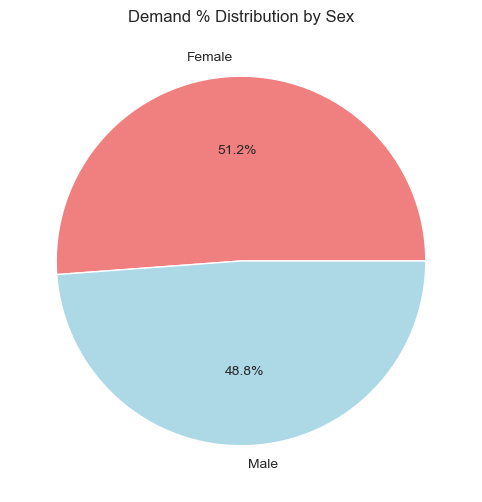

In [97]:
# Plotting Sex Distribution
plt.figure(figsize=(10, 6))
demographic_data.groupby('Sex')['Demand %'].mean().plot(kind='pie', autopct='%1.1f%%', colors=['lightcoral', 'lightblue'])
plt.title('Demand % Distribution by Sex')
plt.ylabel('')
plt.show()

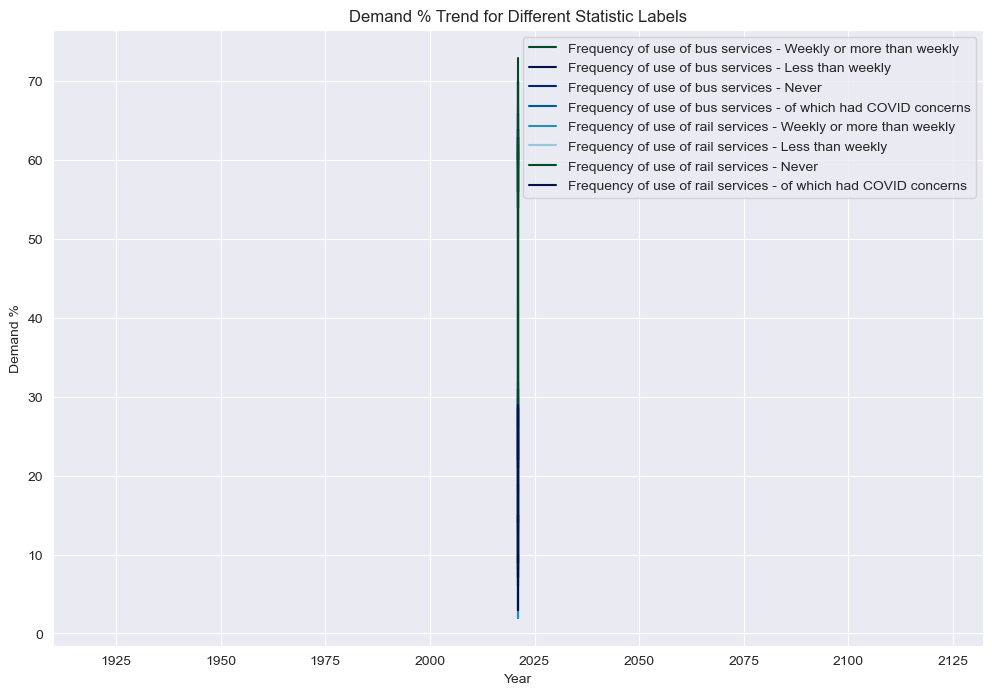

In [98]:
# Plotting Statistic Label Trend over Time
statistic_labels = demographic_data['Statistic Label'].unique()
plt.figure(figsize=(12, 8))
for label in statistic_labels:
    label_data = demographic_data[demographic_data['Statistic Label'] == label]
    plt.plot(label_data.index, label_data['Demand %'], label=label)
plt.xlabel('Year')
plt.ylabel('Demand %')
plt.title('Demand % Trend for Different Statistic Labels')
plt.legend()
plt.grid(True)
plt.show()

# Visulisation for the third dataset:weather_data

In [99]:
weather_data['date'] = pd.to_datetime(weather_data['date'])

In [100]:
weather_data.set_index('date', inplace=True)

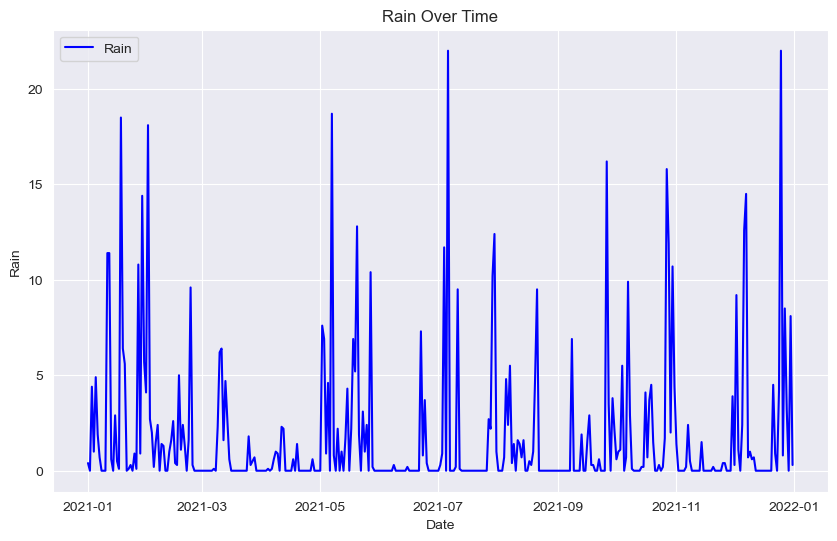

In [101]:
# Plotting Rain over Time
plt.figure(figsize=(10, 6))
plt.plot(weather_data['Rain'], label='Rain', color='blue')
plt.xlabel('Date')
plt.ylabel('Rain')
plt.title('Rain Over Time')
plt.legend()
plt.grid(True)
plt.show()

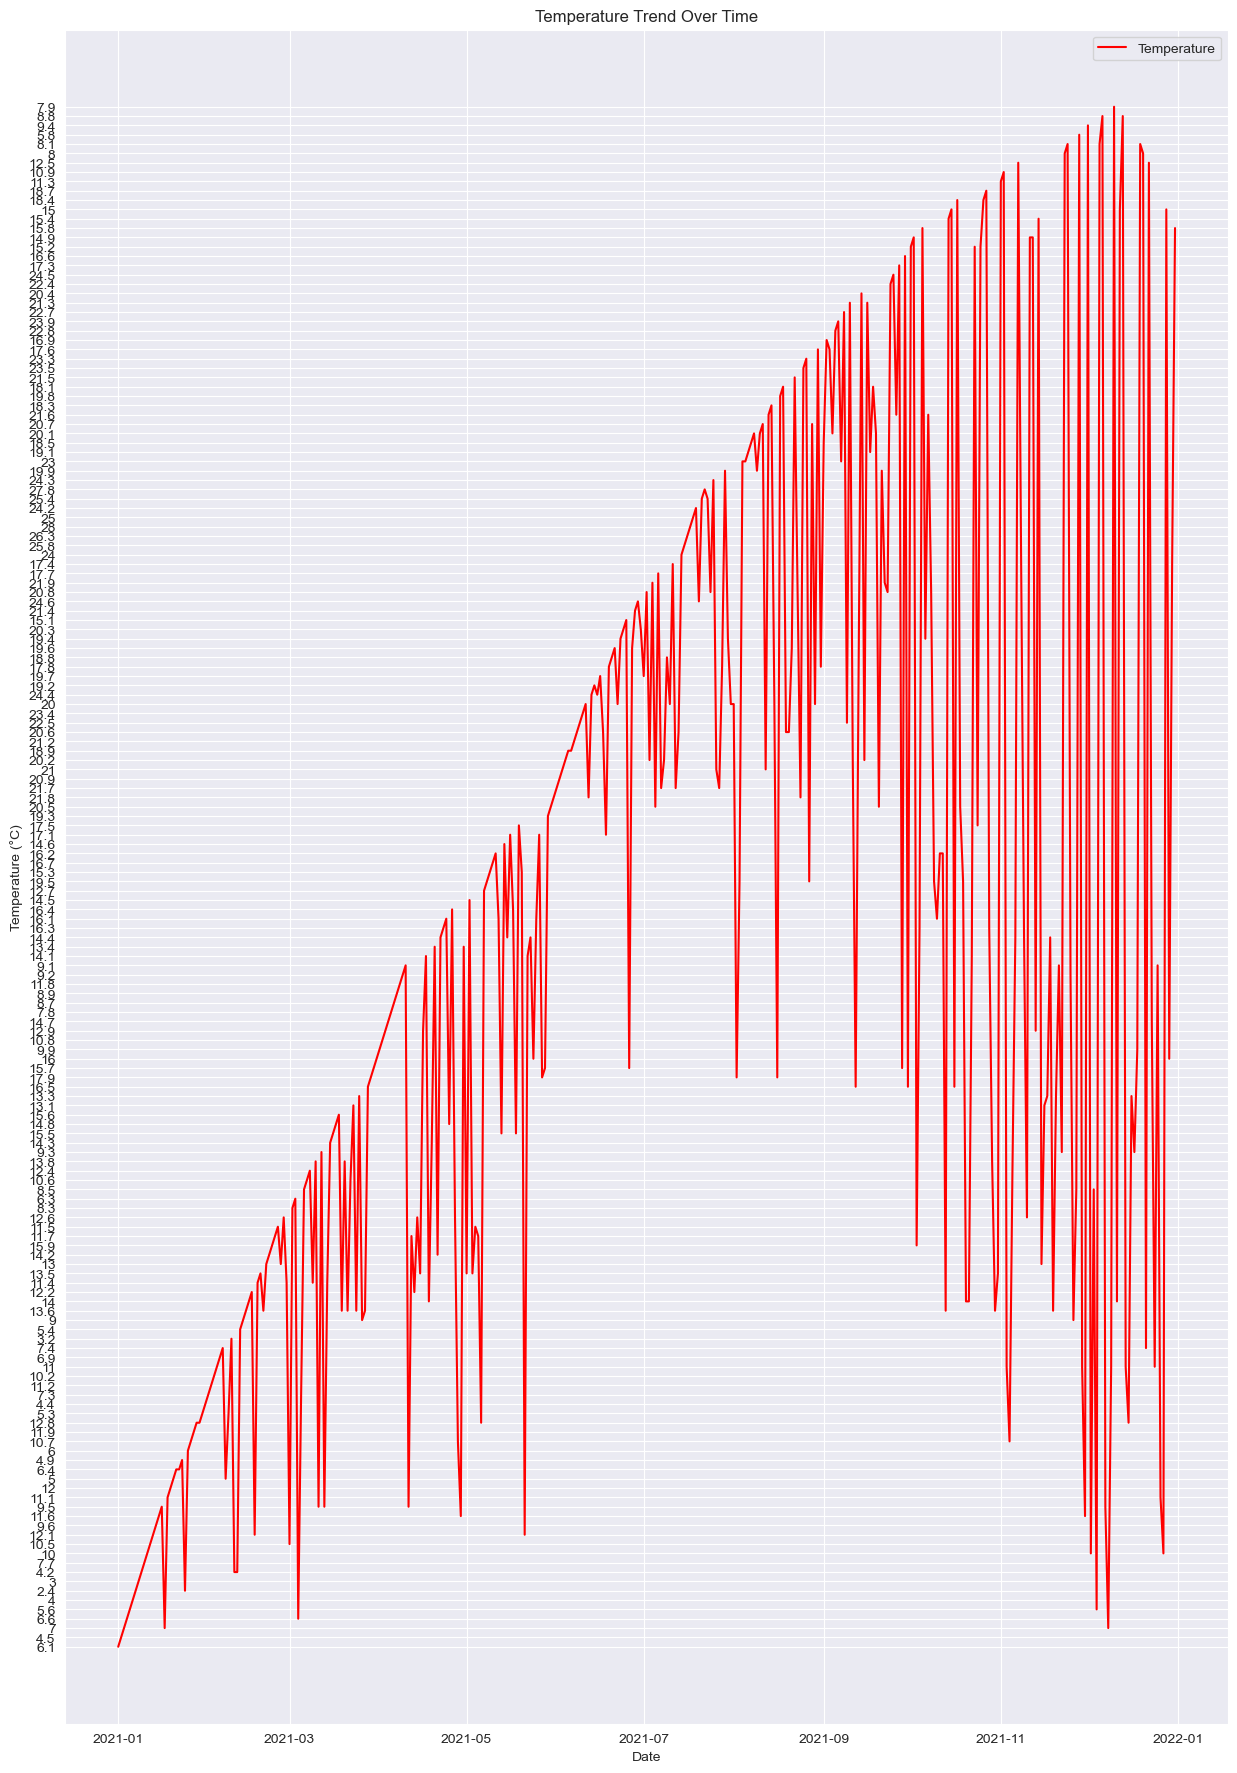

In [102]:
# Plotting Temperature Trend over Time
plt.figure(figsize=(15, 22))
plt.plot(weather_data['Temperature(c)'], label='Temperature', color='red')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.title('Temperature Trend Over Time')
plt.legend()
plt.grid(True)
plt.show()

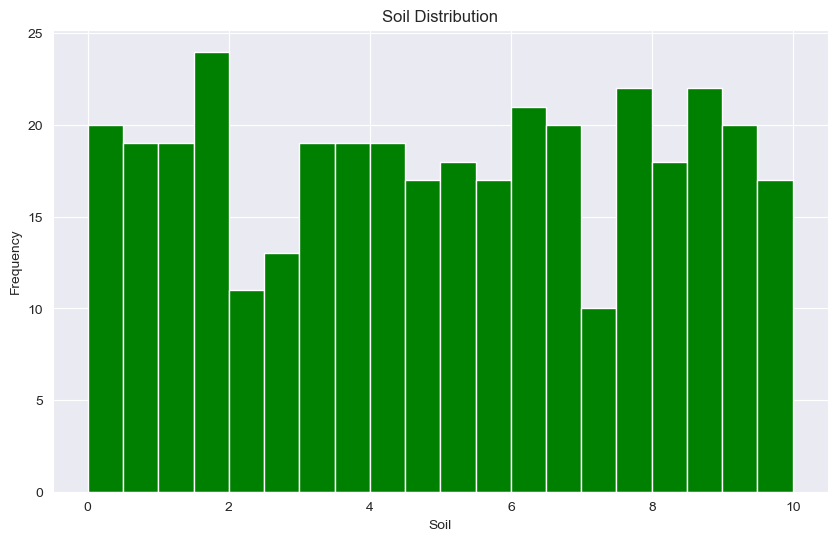

In [103]:
# Plotting Soil Distribution
plt.figure(figsize=(10, 6))
weather_data['Soil'].hist(bins=20, color='green')
plt.xlabel('Soil')
plt.ylabel('Frequency')
plt.title('Soil Distribution')
plt.grid(True)
plt.show()

# Inclusive Preprocessing Methodology

In [104]:
demand_data.head()

Year    Weeks Mode of Transport     Statistic Label  Demand
Date                                                                   
2021-04-01  2021  Week 01  Dublin Metro Bus  Passenger Journeys  747912
2021-11-01  2021  Week 02  Dublin Metro Bus  Passenger Journeys  735000
2021-01-18  2021  Week 03  Dublin Metro Bus  Passenger Journeys  731273
2021-01-25  2021  Week 04  Dublin Metro Bus  Passenger Journeys  742813
2021-01-02  2021  Week 05  Dublin Metro Bus  Passenger Journeys  791189

In [105]:
demographic_data.head()

Statistic Label   Sex      Age Group  \
Year                                                                           
2021  Frequency of use of bus services - Weekly or m...  Male  18 - 24 years   
2021  Frequency of use of bus services - Weekly or m...  Male  25 - 34 years   
2021  Frequency of use of bus services - Weekly or m...  Male  35 - 44 years   
2021  Frequency of use of bus services - Weekly or m...  Male  45 - 54 years   
2021  Frequency of use of bus services - Weekly or m...  Male  55 - 64 years   

      Demand %  
Year            
2021  28.59375  
2021  19.00000  
2021  10.00000  
2021   9.00000  
2021   7.00000

In [106]:
weather_data.head()

Indicator  Rain Temperature(c)      Soil
date                                                
2021-01-01          0   0.4            6.1  4.335267
2021-01-02          4   0.0            4.5  0.705191
2021-01-03          0   4.4              7  8.646481
2021-01-04          0   1.0            6.6  1.644515
2021-01-05          0   4.9            5.6  8.942984

In [107]:
# Checking indexing
print(demand_data.index)
print(demographic_data.index)
print(weather_data.index)

DatetimeIndex(['2021-04-01', '2021-11-01', '2021-01-18', '2021-01-25',
               '2021-01-02', '2021-08-02', '2021-02-15', '2021-02-22',
               '2021-01-03', '2021-08-03',
               ...
               '2021-01-11', '2021-08-11', '2021-11-15', '2021-11-22',
               '2021-11-29', '2021-06-12', '2021-12-13', '2021-12-20',
               '2021-12-27', '2022-03-01'],
              dtype='datetime64[ns]', name='Date', length=212, freq=None)
Int64Index([2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021,
            ...
            2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021],
           dtype='int64', name='Year', length=112)
DatetimeIndex(['2021-01-01', '2021-01-02', '2021-01-03', '2021-01-04',
               '2021-01-05', '2021-01-06', '2021-01-07', '2021-01-08',
               '2021-01-09', '2021-01-10',
               ...
               '2021-12-22', '2021-12-23', '2021-12-24', '2021-12-25',
               '2021-12-26', '2021-12-27', '2021-

In [108]:
# Resetting indexing
demand_data = demand_data.reset_index()
demographic_data = demographic_data.reset_index()
weather_data = weather_data.reset_index()

In [109]:
demand_data.head()

Date  Year    Weeks Mode of Transport     Statistic Label  Demand
0 2021-04-01  2021  Week 01  Dublin Metro Bus  Passenger Journeys  747912
1 2021-11-01  2021  Week 02  Dublin Metro Bus  Passenger Journeys  735000
2 2021-01-18  2021  Week 03  Dublin Metro Bus  Passenger Journeys  731273
3 2021-01-25  2021  Week 04  Dublin Metro Bus  Passenger Journeys  742813
4 2021-01-02  2021  Week 05  Dublin Metro Bus  Passenger Journeys  791189

In [110]:
demographic_data.head()

Year                                    Statistic Label   Sex  \
0  2021  Frequency of use of bus services - Weekly or m...  Male   
1  2021  Frequency of use of bus services - Weekly or m...  Male   
2  2021  Frequency of use of bus services - Weekly or m...  Male   
3  2021  Frequency of use of bus services - Weekly or m...  Male   
4  2021  Frequency of use of bus services - Weekly or m...  Male   

       Age Group  Demand %  
0  18 - 24 years  28.59375  
1  25 - 34 years  19.00000  
2  35 - 44 years  10.00000  
3  45 - 54 years   9.00000  
4  55 - 64 years   7.00000

In [111]:
weather_data.head()

date  Indicator  Rain Temperature(c)      Soil
0 2021-01-01          0   0.4            6.1  4.335267
1 2021-01-02          4   0.0            4.5  0.705191
2 2021-01-03          0   4.4              7  8.646481
3 2021-01-04          0   1.0            6.6  1.644515
4 2021-01-05          0   4.9            5.6  8.942984

In [112]:
print(demand_data.head())
print(demographic_data.head())
print(weather_data.head())

        Date  Year    Weeks Mode of Transport     Statistic Label  Demand
0 2021-04-01  2021  Week 01  Dublin Metro Bus  Passenger Journeys  747912
1 2021-11-01  2021  Week 02  Dublin Metro Bus  Passenger Journeys  735000
2 2021-01-18  2021  Week 03  Dublin Metro Bus  Passenger Journeys  731273
3 2021-01-25  2021  Week 04  Dublin Metro Bus  Passenger Journeys  742813
4 2021-01-02  2021  Week 05  Dublin Metro Bus  Passenger Journeys  791189
   Year                                    Statistic Label   Sex  \
0  2021  Frequency of use of bus services - Weekly or m...  Male   
1  2021  Frequency of use of bus services - Weekly or m...  Male   
2  2021  Frequency of use of bus services - Weekly or m...  Male   
3  2021  Frequency of use of bus services - Weekly or m...  Male   
4  2021  Frequency of use of bus services - Weekly or m...  Male   

       Age Group  Demand %  
0  18 - 24 years  28.59375  
1  25 - 34 years  19.00000  
2  35 - 44 years  10.00000  
3  45 - 54 years   9.00000  
4 

In [113]:
# Renamming the columns in demographic_data to match demand_data for merging
demographic_data.rename(columns={'Statistic Label': 'Mode of Transport'}, inplace=True)

In [114]:
# merging the datasets
merged_data = pd.concat([demand_data, demographic_data, weather_data], ignore_index=True)

In [115]:
# Sorting the concatenated_data by the Date column
merged_data.sort_values(by='Date', inplace=True)

In [116]:
# Resetting the index of the merged data
merged_data.reset_index(drop=True, inplace=True)

In [117]:
merged_data

Date    Year    Weeks                     Mode of Transport  \
0   2021-01-02  2021.0  Week 05                                  Rail   
1   2021-01-02  2021.0  Week 05           Bus, excluding Dublin Metro   
2   2021-01-02  2021.0  Week 05  All public transport, excluding LUAS   
3   2021-01-02  2021.0  Week 05                      Dublin Metro Bus   
4   2021-01-03  2021.0  Week 09                                  Rail   
..         ...     ...      ...                                   ...   
684        NaT     NaN      NaN                                   NaN   
685        NaT     NaN      NaN                                   NaN   
686        NaT     NaN      NaN                                   NaN   
687        NaT     NaN      NaN                                   NaN   
688        NaT     NaN      NaN                                   NaN   

        Statistic Label     Demand  Sex Age Group  Demand %       date  \
0    Passenger Journeys   105426.0  NaN       NaN       NaN        NaT   
1    Passenger Journeys   201849.0  NaN       NaN       NaN        NaT   
2    Passenger Journeys  1098464.0  NaN       NaN       NaN        NaT   
3    Passenger Journeys   791189.0  NaN       NaN       NaN        NaT   
4    Passenger Journeys   142782.0  NaN       NaN       NaN        NaT   
..                  ...        ...  ...       ...       ...        ...   
684                 NaN        NaN  NaN       NaN       NaN 2021-12-27   
685                 NaN        NaN  NaN       NaN       NaN 2021-12-28   
686                 NaN        NaN  NaN       NaN       NaN 2021-12-29   
687                 NaN        NaN  NaN       NaN       NaN 2021-12-30   
688                 NaN        NaN  NaN       NaN       NaN 2021-12-31   

     Indicator  Rain Temperature(c)      Soil  
0          NaN   NaN            NaN       NaN  
1          NaN   NaN            NaN       NaN  
2          NaN   NaN            NaN       NaN  
3          NaN   NaN            NaN       NaN  
4          NaN   NaN            NaN       NaN  
..         ...   ...            ...       ...  
684        0.0   8.5             10  9.479369  
685        0.0   3.2             15  1.485772  
686        0.0   0.0             16  5.074041  
687        0.0   8.1           17.4  6.910197  
688        0.0   0.3           15.8  1.510423  

[689 rows x 14 columns]

In [118]:
# Dropping the date column to make it easier
merged_data.drop(['date'], axis = 1, inplace = True)

In [119]:
merged_data

Date    Year    Weeks                     Mode of Transport  \
0   2021-01-02  2021.0  Week 05                                  Rail   
1   2021-01-02  2021.0  Week 05           Bus, excluding Dublin Metro   
2   2021-01-02  2021.0  Week 05  All public transport, excluding LUAS   
3   2021-01-02  2021.0  Week 05                      Dublin Metro Bus   
4   2021-01-03  2021.0  Week 09                                  Rail   
..         ...     ...      ...                                   ...   
684        NaT     NaN      NaN                                   NaN   
685        NaT     NaN      NaN                                   NaN   
686        NaT     NaN      NaN                                   NaN   
687        NaT     NaN      NaN                                   NaN   
688        NaT     NaN      NaN                                   NaN   

        Statistic Label     Demand  Sex Age Group  Demand %  Indicator  Rain  \
0    Passenger Journeys   105426.0  NaN       NaN       NaN        NaN   NaN   
1    Passenger Journeys   201849.0  NaN       NaN       NaN        NaN   NaN   
2    Passenger Journeys  1098464.0  NaN       NaN       NaN        NaN   NaN   
3    Passenger Journeys   791189.0  NaN       NaN       NaN        NaN   NaN   
4    Passenger Journeys   142782.0  NaN       NaN       NaN        NaN   NaN   
..                  ...        ...  ...       ...       ...        ...   ...   
684                 NaN        NaN  NaN       NaN       NaN        0.0   8.5   
685                 NaN        NaN  NaN       NaN       NaN        0.0   3.2   
686                 NaN        NaN  NaN       NaN       NaN        0.0   0.0   
687                 NaN        NaN  NaN       NaN       NaN        0.0   8.1   
688                 NaN        NaN  NaN       NaN       NaN        0.0   0.3   

    Temperature(c)      Soil  
0              NaN       NaN  
1              NaN       NaN  
2              NaN       NaN  
3              NaN       NaN  
4              NaN       NaN  
..             ...       ...  
684             10  9.479369  
685             15  1.485772  
686             16  5.074041  
687           17.4  6.910197  
688           15.8  1.510423  

[689 rows x 13 columns]

In [120]:
# Dealing with missing values with random values from the same column 
for column in merged_data.columns:
    non_null_values = merged_data[column].dropna()
    num_missing_values = merged_data[column].isnull().sum()
    if num_missing_values > 0:
        random_fill_values = np.random.choice(non_null_values, num_missing_values)
        merged_data[column][merged_data[column].isnull()] = random_fill_values

In [121]:
# Converting the date colum to datetime
merged_data['Date'] = pd.to_datetime(merged_data['Date'])

In [122]:
# Extracting Weeks number to arrange according to Date column 
merged_data['Weeks'] = merged_data['Date'].dt.strftime('%U')

In [123]:
# Sorting the dataset according to the Date column 
merged_data.sort_values(by='Date', inplace=True)

In [124]:
# Resetting the index
merged_data.reset_index(drop=True, inplace=True)

In [125]:
merged_data.head()

Date    Year Weeks                     Mode of Transport  \
0 2021-01-02  2021.0    00                                  Rail   
1 2021-01-02  2021.0    00           Bus, excluding Dublin Metro   
2 2021-01-02  2021.0    00  All public transport, excluding LUAS   
3 2021-01-02  2021.0    00                      Dublin Metro Bus   
4 2021-01-02  2021.0    00           Bus, excluding Dublin Metro   

      Statistic Label     Demand     Sex      Age Group  Demand %  Indicator  \
0  Passenger Journeys   105426.0  Female  55 - 64 years  56.00000        0.0   
1  Passenger Journeys   201849.0    Male  45 - 54 years  28.59375        0.0   
2  Passenger Journeys  1098464.0  Female  18 - 24 years  61.00000        0.0   
3  Passenger Journeys   791189.0    Male  65 - 74 years  30.00000        0.0   
4  Passenger Journeys  2159300.0    Male  18 - 24 years  28.59375        0.0   

   Rain Temperature(c)      Soil  
0   2.1           12.1  9.589836  
1   0.0           21.7  1.225424  
2   0.2            9.4  5.953899  
3   0.0             20  1.055456  
4   4.6           11.7  1.249714

# Detecting and addressing outliers that might affect the model's performance.

In [126]:
# Specifying columns to consider for outlier detection
numerical_columns = ['Demand', 'Demand %','Indicator','Rain', 'Temperature(c)', 'Soil']

In [127]:
# Calculating z-scores for each numerical column
z_scores = np.abs((merged_data[numerical_columns] - merged_data[numerical_columns].mean()) / merged_data[numerical_columns].std())

In [128]:
print("Z-Scores:")
print(z_scores)

Z-Scores:
       Demand  Demand %  Indicator      Rain      Soil Temperature(c)
0    1.068531  1.339781   0.362177  0.077505  1.536583            NaN
1    0.963993  0.006436   0.362177  0.482922  1.271459            NaN
2    0.008082  1.585385   0.362177  0.429548  0.315952            NaN
3    0.325053  0.062640   0.362177  0.482922  1.328520            NaN
4    1.158199  0.006436   0.362177  0.744679  1.263305            NaN
..        ...       ...        ...       ...       ...            ...
684  0.487106  0.477689   0.362177  0.322800  1.151467            NaN
685  0.967723  1.339781   0.362177  0.242739  0.129529            NaN
686  0.923582  0.526810   0.362177  0.055930  0.063664            NaN
687  0.158042  0.919777   0.362177  0.402861  1.139343            NaN
688  0.690306  1.585385   0.362177  0.482922  0.416055            NaN

[689 rows x 6 columns]


In [129]:
# Setting a threshold for outlier detection
outlier_threshold = 3

In [130]:
# Creating a mask for outliers
outlier_mask = z_scores > outlier_threshold

In [131]:
# Dropping rows with outliers
merged_data = merged_data[~outlier_mask.any(axis=1)]

In [132]:
merged_data.head()

Date    Year Weeks                     Mode of Transport  \
0 2021-01-02  2021.0    00                                  Rail   
1 2021-01-02  2021.0    00           Bus, excluding Dublin Metro   
2 2021-01-02  2021.0    00  All public transport, excluding LUAS   
3 2021-01-02  2021.0    00                      Dublin Metro Bus   
4 2021-01-02  2021.0    00           Bus, excluding Dublin Metro   

      Statistic Label     Demand     Sex      Age Group  Demand %  Indicator  \
0  Passenger Journeys   105426.0  Female  55 - 64 years  56.00000        0.0   
1  Passenger Journeys   201849.0    Male  45 - 54 years  28.59375        0.0   
2  Passenger Journeys  1098464.0  Female  18 - 24 years  61.00000        0.0   
3  Passenger Journeys   791189.0    Male  65 - 74 years  30.00000        0.0   
4  Passenger Journeys  2159300.0    Male  18 - 24 years  28.59375        0.0   

   Rain Temperature(c)      Soil  
0   2.1           12.1  9.589836  
1   0.0           21.7  1.225424  
2   0.2            9.4  5.953899  
3   0.0             20  1.055456  
4   4.6           11.7  1.249714

# Standardising numerical features to ensure consistent scaling.

In [133]:
# Specifying columns to Standadise
numerical_columns = ['Demand', 'Demand %','Indicator','Rain', 'Temperature(c)', 'Soil']

In [134]:
scaler = MinMaxScaler()

In [135]:
# Fitting the scaler on the data and transforming the selected columns
merged_data[numerical_columns] = scaler.fit_transform(merged_data[numerical_columns])

In [136]:
merged_data.head()

Date    Year Weeks                     Mode of Transport  \
0 2021-01-02  2021.0    00                                  Rail   
1 2021-01-02  2021.0    00           Bus, excluding Dublin Metro   
2 2021-01-02  2021.0    00  All public transport, excluding LUAS   
3 2021-01-02  2021.0    00                      Dublin Metro Bus   
4 2021-01-02  2021.0    00           Bus, excluding Dublin Metro   

      Statistic Label    Demand     Sex      Age Group  Demand %  Indicator  \
0  Passenger Journeys  0.004472  Female  55 - 64 years  0.760563        0.0   
1  Passenger Journeys  0.033421    Male  45 - 54 years  0.374560        0.0   
2  Passenger Journeys  0.302608  Female  18 - 24 years  0.830986        0.0   
3  Passenger Journeys  0.210356    Male  65 - 74 years  0.394366        0.0   
4  Passenger Journeys  0.621099    Male  18 - 24 years  0.374560        0.0   

       Rain  Temperature(c)      Soil  
0  0.164062        0.378906  0.960191  
1  0.000000        0.753906  0.122153  
2  0.015625        0.273438  0.595903  
3  0.000000        0.687500  0.105124  
4  0.359375        0.363281  0.124587

# Encoding categorical variables using one-hot encoding and label Encoder

In [137]:
# Specifying columns to encode
categorical_columns = ['Mode of Transport','Statistic Label', 'Sex', 'Age Group','Soil','Demand %','Temperature(c)']

In [138]:
# Perform one-hot encoding method
one_hot_encoded = pd.get_dummies(merged_data, columns=categorical_columns, drop_first=True)

In [139]:
# Encode categorical columns
label_encoder = LabelEncoder()
for col in categorical_columns:
    merged_data[col] = label_encoder.fit_transform(merged_data[col])

In [140]:
merged_data

Date    Year Weeks  Mode of Transport  Statistic Label    Demand  \
0   2021-01-02  2021.0    00                 11                0  0.004472   
1   2021-01-02  2021.0    00                  1                0  0.033421   
2   2021-01-02  2021.0    00                  0                0  0.302608   
3   2021-01-02  2021.0    00                  2                0  0.210356   
4   2021-01-02  2021.0    00                  1                0  0.621099   
..         ...     ...   ...                ...              ...       ...   
684 2022-03-01  2021.0    09                  2                0  0.165481   
685 2022-03-01  2021.0    09                  1                0  0.032388   
686 2022-03-01  2021.0    09                 10                0  0.044612   
687 2022-03-01  2021.0    09                 10                0  0.256605   
688 2022-03-01  2021.0    09                  2                0  0.109211   

     Sex  Age Group  Demand %  Indicator      Rain  Temperature(c)  Soil  
0      0          4        36        0.0  0.164062              58   344  
1      1          3        25        0.0  0.000000             140    43  
2      0          0        39        0.0  0.015625              36   209  
3      1          5        27        0.0  0.000000             124    40  
4      1          0        25        0.0  0.359375              54    45  
..   ...        ...       ...        ...       ...             ...   ...  
684    1          4        17        0.0  0.046875              80   296  
685    1          3        36        0.0  0.070312              71   189  
686    0          6        16        0.0  0.125000             158   171  
687    0          2         8        0.0  0.023438              63   295  
688    0          5        39        0.0  0.000000             141   129  

[670 rows x 13 columns]

# Perform feature selection to identify the most relevant features for the predictive models of my dataset

# Correlation Analysis:

In [141]:
# Calculating correlations
correlation_matrix = merged_data.corr()

In [142]:
# Sorting features by their correlation with the target variable
correlation_with_target = correlation_matrix['Demand'].abs().sort_values(ascending=False)

In [143]:
# Selecting top N relevant features
top_features = correlation_with_target[1:6].index.tolist()

# Feature Importance from Models:

In [144]:
# Separating features and target
X = merged_data.drop(columns=['Demand'])
y = merged_data['Demand']

In [145]:
# Encoding categorical variables using one-hot encoding
X_encoded = pd.get_dummies(X, columns=['Mode of Transport','Statistic Label', 'Sex', 'Age Group'])

In [146]:
# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

In [147]:
print(X_train.dtypes)

Date                    datetime64[ns]
Year                           float64
Weeks                           object
Demand %                         int64
Indicator                      float64
Rain                           float64
Temperature(c)                   int64
Soil                             int64
Mode of Transport_0              uint8
Mode of Transport_1              uint8
Mode of Transport_2              uint8
Mode of Transport_3              uint8
Mode of Transport_4              uint8
Mode of Transport_5              uint8
Mode of Transport_6              uint8
Mode of Transport_7              uint8
Mode of Transport_8              uint8
Mode of Transport_9              uint8
Mode of Transport_10             uint8
Mode of Transport_11             uint8
Statistic Label_0                uint8
Sex_0                            uint8
Sex_1                            uint8
Age Group_0                      uint8
Age Group_1                      uint8
Age Group_2              

In [148]:
X_train['Year'] = X_train['Date'].dt.year
X_train['Month'] = X_train['Date'].dt.month
X_train['Day'] = X_train['Date'].dt.day
X_train.drop(columns=['Date'], inplace=True)

In [149]:
# Trainning a RandomForestRegressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [150]:
# Getting the feature importance scores
feature_importances = model.feature_importances_

In [151]:
# Getting the columns from X_train after one-hot encoding
encoded_columns = X_train.columns

In [152]:
# Creating a DataFrame for feature importances using the correct columns
feature_importance_df = pd.DataFrame({'Feature': encoded_columns, 'Importance': feature_importances})

In [153]:
# Sortting the features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

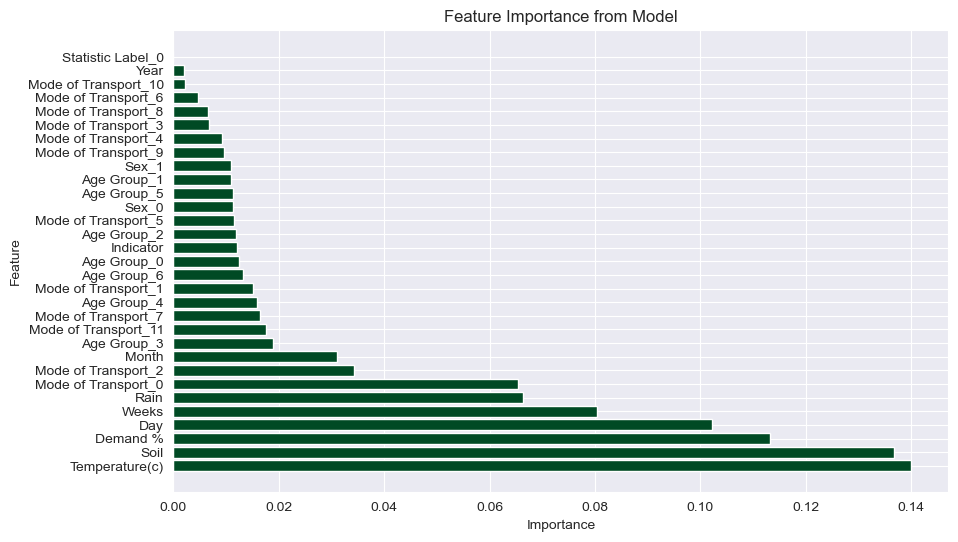

In [154]:
# Plotting feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance from Model')
plt.show()

# Exploring different ML models for our datset

In [155]:
# Converting Date column to datetime type
merged_data['Date'] = pd.to_datetime(merged_data['Date'])

In [156]:
# Calculating the number of days since one reference date
reference_date = merged_data['Date'].min()
merged_data['Days_Since_Reference'] = (merged_data['Date'] - reference_date).dt.days

In [157]:
# Defining features and target variable
X = merged_data.drop(['Demand', 'Date'], axis=1)
y = merged_data['Demand']

# Linear Regression:

In [158]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [159]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [160]:
model = LinearRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

In [161]:
# Making predictions
predictions = model.predict(X_test)

In [162]:
mse = mean_squared_error(y_test, predictions)
print("Linear Regression MSE:", mse)

Linear Regression MSE: 0.06867726194220962


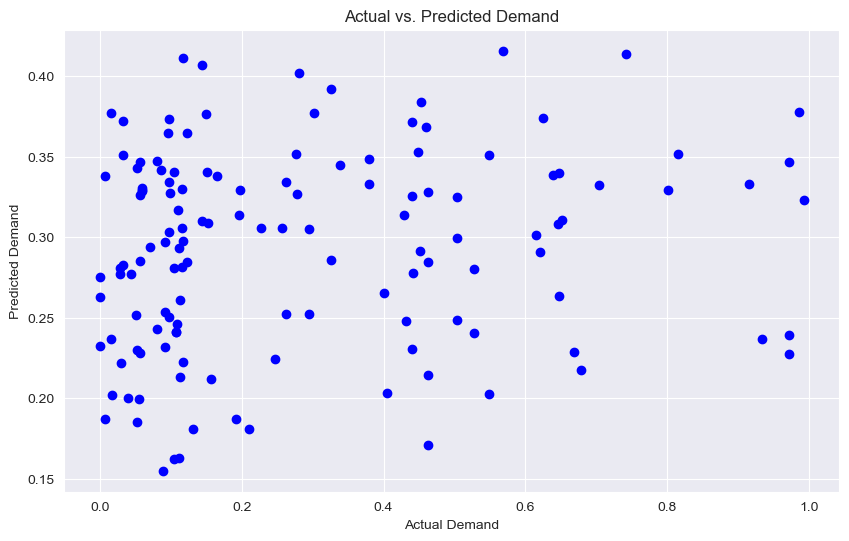

In [163]:
# Scatter plot for actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions, color='blue')
plt.xlabel('Actual Demand')
plt.ylabel('Predicted Demand')
plt.title('Actual vs. Predicted Demand')
plt.grid(True)
plt.show()

# Decision Trees:

In [164]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

In [165]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [166]:
model = DecisionTreeRegressor()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

In [167]:
mse = mean_squared_error(y_test, predictions)
print("Decision Tree MSE:", mse)

Decision Tree MSE: 0.14401258561523014


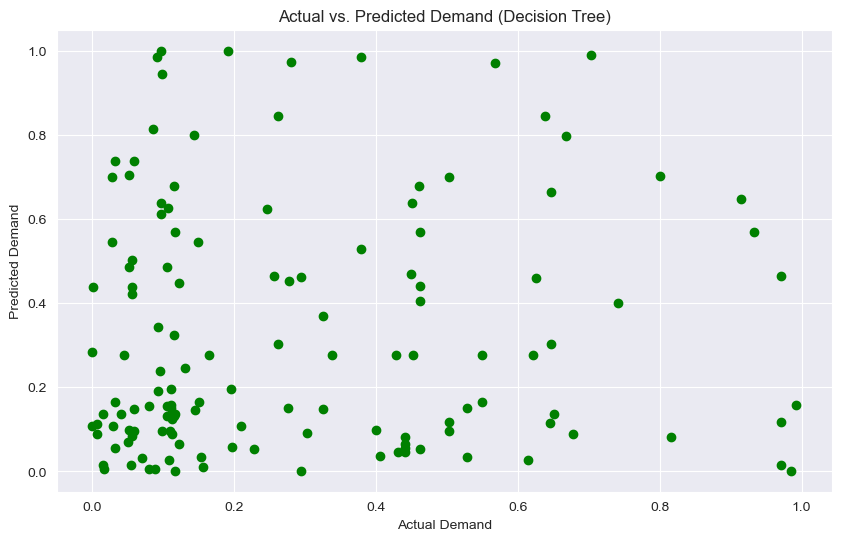

In [168]:
# Scatter plot for actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions, color='green')
plt.xlabel('Actual Demand')
plt.ylabel('Predicted Demand')
plt.title('Actual vs. Predicted Demand (Decision Tree)')
plt.grid(True)
plt.show()

# Random Forest:

In [169]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [170]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [171]:
model = RandomForestRegressor()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

In [172]:
mse = mean_squared_error(y_test, predictions)
print("Random Forest MSE:", mse)

Random Forest MSE: 0.07306943571845431


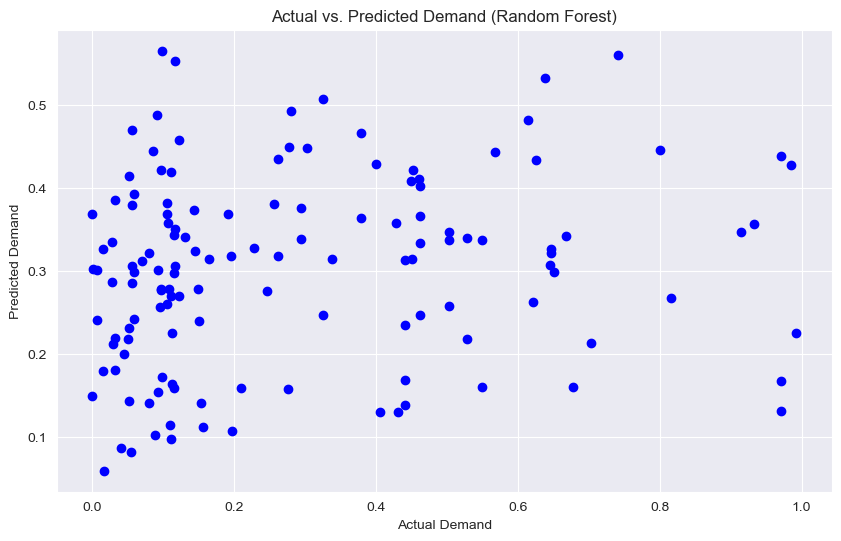

In [173]:
# Scatter plot for actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions, color='blue')
plt.xlabel('Actual Demand')
plt.ylabel('Predicted Demand')
plt.title('Actual vs. Predicted Demand (Random Forest)')
plt.grid(True)
plt.show()

# Neural Networks (using Keras):

In [174]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import mean_squared_error

In [175]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [176]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [177]:
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(1, activation='linear'))

In [178]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train_scaled, y_train, epochs=100, batch_size=32)

Epoch 1/100
17/17 [==============================] - 1s 3ms/step - loss: 0.6995
Epoch 2/100
17/17 [==============================] - 0s 3ms/step - loss: 0.2761
Epoch 3/100
17/17 [==============================] - 0s 4ms/step - loss: 0.1413
Epoch 4/100
17/17 [==============================] - 0s 3ms/step - loss: 0.1039
Epoch 5/100
17/17 [==============================] - 0s 3ms/step - loss: 0.0907
Epoch 6/100
17/17 [==============================] - 0s 4ms/step - loss: 0.0844
Epoch 7/100
17/17 [==============================] - 0s 3ms/step - loss: 0.0809
Epoch 8/100
17/17 [==============================] - 0s 4ms/step - loss: 0.0778
Epoch 9/100
17/17 [==============================] - 0s 3ms/step - loss: 0.0749
Epoch 10/100
17/17 [==============================] - 0s 3ms/step - loss: 0.0729
Epoch 11/100
17/17 [==============================] - 0s 3ms/step - loss: 0.0708
Epoch 12/100
17/17 [==============================] - 0s 3ms/step - loss: 0.0692
Epoch 13/100
17/17 [=================

In [179]:
predictions = model.predict(X_test_scaled)
mse = mean_squared_error(y_test, predictions)
print("Neural Network MSE:", mse)

5/5 [==============================] - 0s 1ms/step
Neural Network MSE: 0.08794907701751749


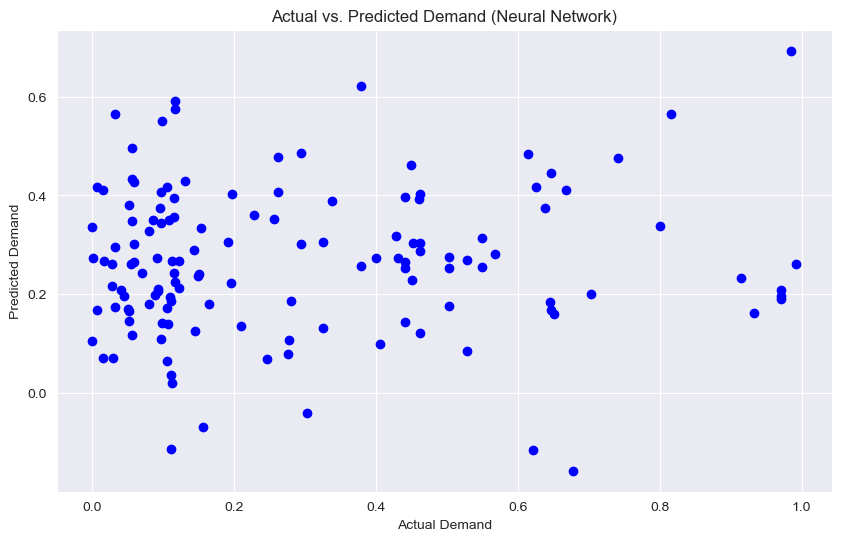

In [180]:
# Scatter plot for actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions, color='blue')
plt.xlabel('Actual Demand')
plt.ylabel('Predicted Demand')
plt.title('Actual vs. Predicted Demand (Neural Network)')
plt.grid(True)
plt.show()

# Investigating time series analysis methods, including autoregressive integrated moving average (ARIMA),seasonal decomposition of time series (STL) and long short-term memory networks (LSTM)

In [181]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from pmdarima import auto_arima
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import LSTM, Dense
from statsmodels.tsa.arima.model import ARIMA 

In [182]:
# Converting Date column to datetime type
merged_data['Date'] = pd.to_datetime(merged_data['Date'])

In [183]:
# Setting Date as the index
merged_data.set_index('Date', inplace=True)

In [184]:
resampled_data = merged_data.resample('W').sum()

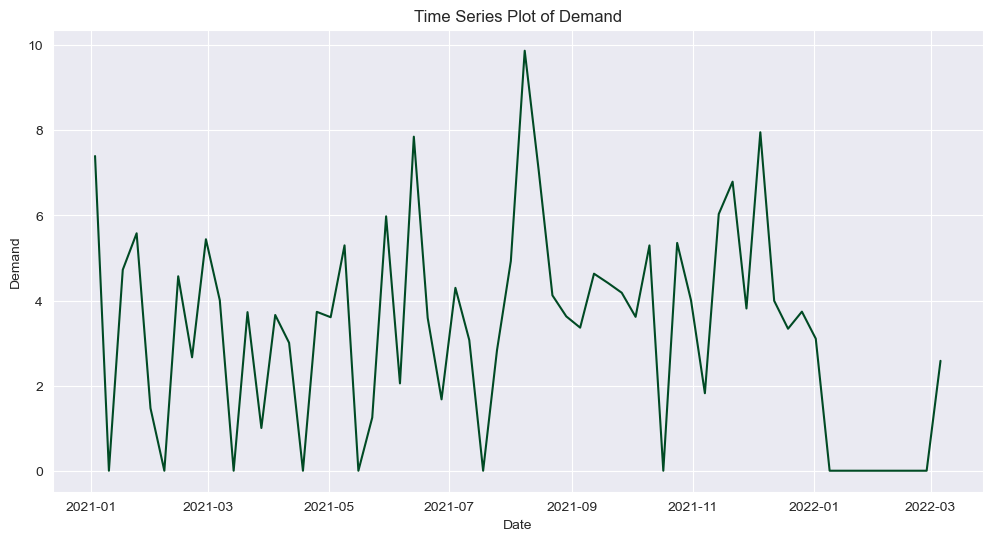

In [185]:
# Plotting the time series data
plt.figure(figsize=(12, 6))
plt.plot(resampled_data['Demand'])
plt.title('Time Series Plot of Demand')
plt.xlabel('Date')
plt.ylabel('Demand')
plt.show()

# STL

In [186]:
# Seasonal Decomposition using STL
result = seasonal_decompose(resampled_data['Demand'], model='additive', period=26)

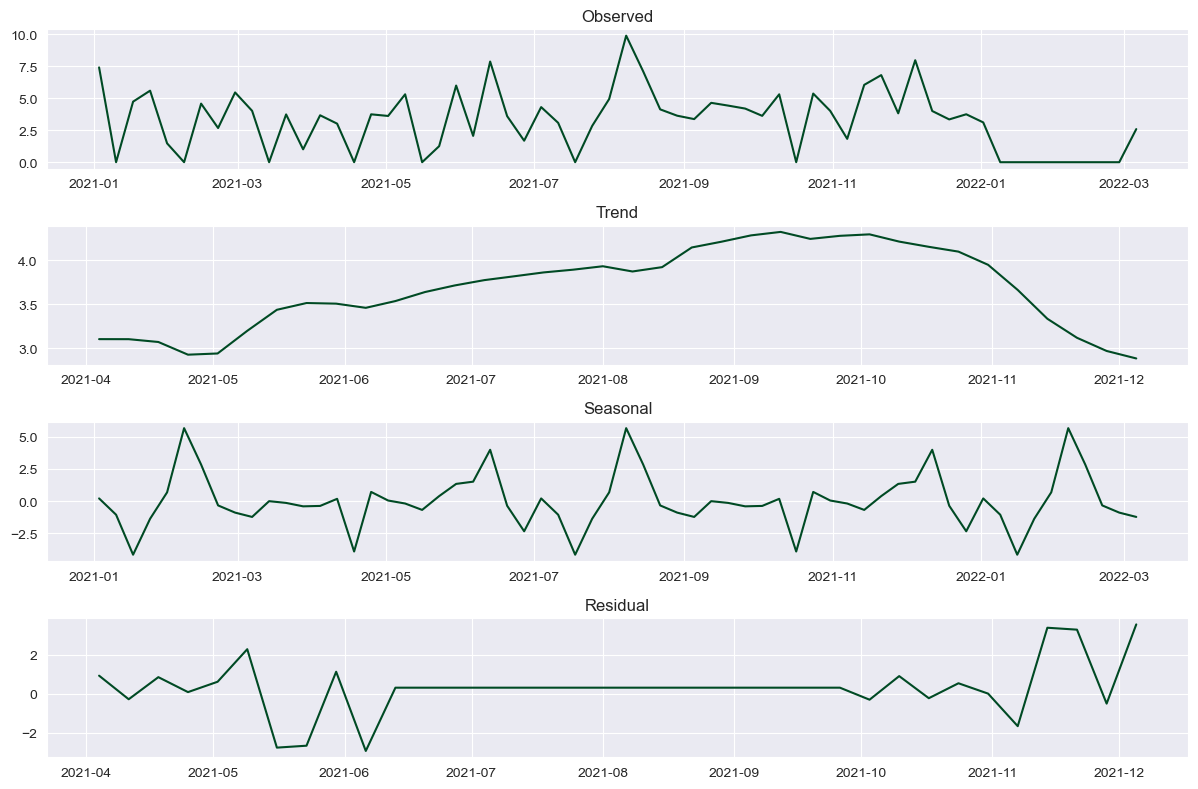

In [187]:
# Plotting the decomposition components
plt.figure(figsize=(12, 8))
plt.subplot(4, 1, 1)
plt.plot(result.observed)
plt.title('Observed')
plt.subplot(4, 1, 2)
plt.plot(result.trend)
plt.title('Trend')
plt.subplot(4, 1, 3)
plt.plot(result.seasonal)
plt.title('Seasonal')
plt.subplot(4, 1, 4)
plt.plot(result.resid)
plt.title('Residual')
plt.tight_layout()
plt.show()

# ARIMA

In [188]:
# ARIMA Modeling using auto arima to find optimal parameters
stepwise_fit = auto_arima(resampled_data['Demand'], seasonal=True, m=52, trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[52] intercept   : AIC=294.337, Time=9.06 sec
 ARIMA(0,0,0)(0,0,0)[52] intercept   : AIC=289.632, Time=0.03 sec
 ARIMA(1,0,0)(1,0,0)[52] intercept   : AIC=289.984, Time=1.83 sec
 ARIMA(0,0,1)(0,0,1)[52] intercept   : AIC=290.684, Time=1.14 sec
 ARIMA(0,0,0)(0,0,0)[52]             : AIC=350.960, Time=0.02 sec
 ARIMA(0,0,0)(1,0,0)[52] intercept   : AIC=291.605, Time=1.64 sec
 ARIMA(0,0,0)(0,0,1)[52] intercept   : AIC=291.605, Time=0.81 sec
 ARIMA(0,0,0)(1,0,1)[52] intercept   : AIC=293.605, Time=1.25 sec
 ARIMA(1,0,0)(0,0,0)[52] intercept   : AIC=288.116, Time=0.07 sec
 ARIMA(1,0,0)(0,0,1)[52] intercept   : AIC=289.984, Time=2.37 sec
 ARIMA(1,0,0)(1,0,1)[52] intercept   : AIC=291.984, Time=1.90 sec
 ARIMA(2,0,0)(0,0,0)[52] intercept   : AIC=288.883, Time=0.10 sec
 ARIMA(1,0,1)(0,0,0)[52] intercept   : AIC=287.930, Time=0.19 sec
 ARIMA(1,0,1)(1,0,0)[52] intercept   : AIC=289.653, Time=3.33 sec
 ARIMA(1,0,1)(0,0,1)[52] intercep

In [189]:
# Fitting the ARIMA model
order = stepwise_fit.get_params()['order']
seasonal_order = stepwise_fit.get_params()['seasonal_order']
model = ARIMA(resampled_data['Demand'], order=order, seasonal_order=seasonal_order)
arima_result = model.fit()

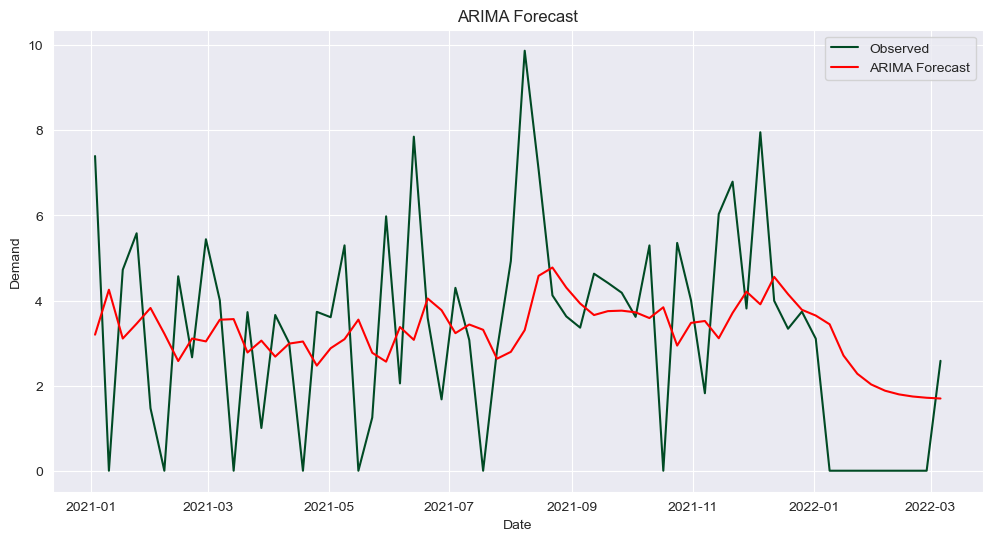

In [190]:
# Plotting ARIMA forecast
plt.figure(figsize=(12, 6))
plt.plot(resampled_data.index, resampled_data['Demand'], label='Observed')
plt.plot(resampled_data.index, arima_result.predict(typ='levels'), color='red', label='ARIMA Forecast')
plt.title('ARIMA Forecast')
plt.xlabel('Date')
plt.ylabel('Demand')
plt.legend()
plt.show()

# LSTM

In [191]:
# Prepare data for LSTM
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(np.array(resampled_data['Demand']).reshape(-1, 1))

In [192]:
# Split data into train and test sets
train_size = int(len(scaled_data) * 0.8)
train_data, test_data = scaled_data[:train_size], scaled_data[train_size:]

In [193]:
# Creating sequences for LSTM
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

seq_length = 10
X_train, y_train = create_sequences(train_data, seq_length)
X_test, y_test = create_sequences(test_data, seq_length)

In [194]:
# Build LSTM model
model_lstm = Sequential()
model_lstm.add(LSTM(50, activation='relu', input_shape=(seq_length, 1)))
model_lstm.add(Dense(1))
model_lstm.compile(optimizer='adam', loss='mse')

In [195]:
# Trainning LSTM model
model_lstm.fit(X_train, y_train, epochs=50, batch_size=16, verbose=1)

Epoch 1/50
3/3 [==============================] - 3s 8ms/step - loss: 0.2183
Epoch 2/50
3/3 [==============================] - 0s 8ms/step - loss: 0.1870
Epoch 3/50
3/3 [==============================] - 0s 10ms/step - loss: 0.1621
Epoch 4/50
3/3 [==============================] - 0s 9ms/step - loss: 0.1377
Epoch 5/50
3/3 [==============================] - 0s 8ms/step - loss: 0.1156
Epoch 6/50
3/3 [==============================] - 0s 8ms/step - loss: 0.0977
Epoch 7/50
3/3 [==============================] - 0s 12ms/step - loss: 0.0794
Epoch 8/50
3/3 [==============================] - 0s 9ms/step - loss: 0.0652
Epoch 9/50
3/3 [==============================] - 0s 12ms/step - loss: 0.0589
Epoch 10/50
3/3 [==============================] - 0s 11ms/step - loss: 0.0552
Epoch 11/50
3/3 [==============================] - 0s 8ms/step - loss: 0.0576
Epoch 12/50
3/3 [==============================] - 0s 9ms/step - loss: 0.0581
Epoch 13/50
3/3 [==============================] - 0s 8ms/step - loss

In [196]:
# Making predictions using LSTM model
y_pred = model_lstm.predict(X_test)

1/1 [==============================] - 0s 340ms/step


In [197]:
# Inverse transform predictions for comparison
y_pred_inv = scaler.inverse_transform(y_pred)
y_test_inv = scaler.inverse_transform(y_test)

In [198]:
# Calculating RMSE for LSTM
rmse_lstm = np.sqrt(mean_squared_error(y_test_inv, y_pred_inv))
print(f'RMSE for LSTM: {rmse_lstm}')

RMSE for LSTM: 2.098712122209184


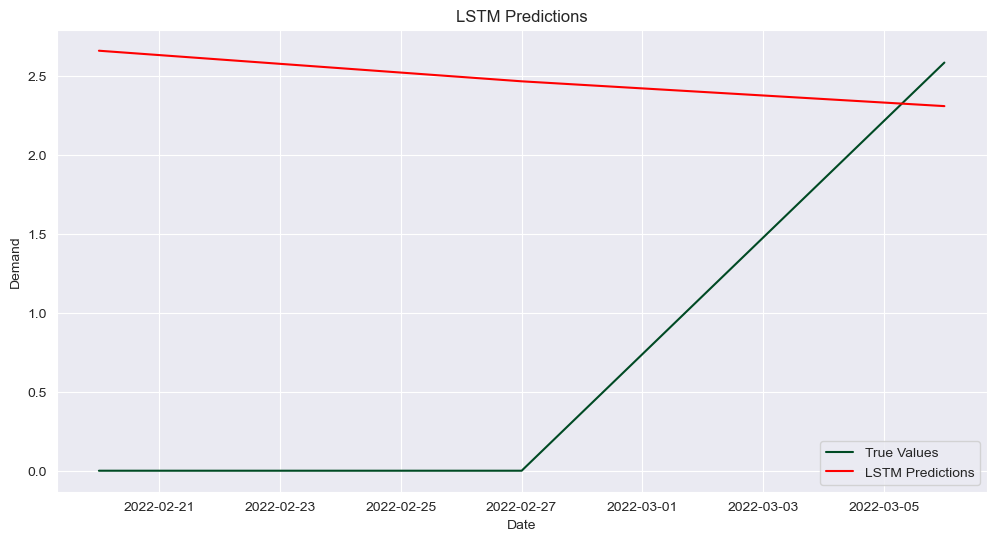

In [199]:
# Plotting LSTM predictions
plt.figure(figsize=(12, 6))
plt.plot(resampled_data.index[train_size+seq_length:], y_test_inv, label='True Values')
plt.plot(resampled_data.index[train_size+seq_length:], y_pred_inv, label='LSTM Predictions', color='red')
plt.title('LSTM Predictions')
plt.xlabel('Date')
plt.ylabel('Demand')
plt.legend()
plt.show()

# Supervised Machine Learning

In [200]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, mean_squared_error

In [201]:
X = merged_data.drop(['Demand %'], axis=1) 
y = merged_data['Demand %'] 

In [202]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [203]:
# Preprocessing
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [204]:
# Regression Models
regressors = {
    'Linear Regression': LinearRegression(),
    'Decision Tree Regressor': DecisionTreeRegressor(random_state=42)
}

In [205]:
for name, model in regressors.items():
    # Trainning the model
    model.fit(X_train_scaled, y_train)
    
    # Predict on the test set
    y_pred = model.predict(X_test_scaled)
    
    # Evaluate the model
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    print(f'{name}: RMSE = {rmse}')

Linear Regression: RMSE = 12.915306971797328
Decision Tree Regressor: RMSE = 19.133271794239448


In [206]:
# Classification Models
classifiers = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Decision Tree Classifier': DecisionTreeClassifier(random_state=42)
}

In [207]:
# Mode of Transportfor classification
y_train_class = (y_train > 0.5).astype(int)
y_test_class = (y_test > 0.5).astype(int)

In [208]:
for name, model in classifiers.items():
    # Train the model
    model.fit(X_train_scaled, y_train_class)
    
    # Predict on the test set
    y_pred_class = model.predict(X_test_scaled)

In [209]:
    # Evaluate the model
    accuracy = accuracy_score(y_test_class, y_pred_class)
    precision = precision_score(y_test_class, y_pred_class)
    recall = recall_score(y_test_class, y_pred_class)
    f1 = f1_score(y_test_class, y_pred_class)

In [210]:
print(f'{name}: Accuracy = {accuracy}, Precision = {precision}, Recall = {recall}, F1-score = {f1}')

Decision Tree Classifier: Accuracy = 0.9402985074626866, Precision = 0.9921259842519685, Recall = 0.9473684210526315, F1-score = 0.9692307692307692


# Hyperparameter Tuning and Grid Search Cross-Validation

In [211]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [212]:
# Defining features and target variable
X = merged_data.drop(["Demand"], axis=1)
y = merged_data["Demand"]

In [213]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [214]:
# Initialize a RandomForestRegressor
rf_model = RandomForestRegressor(random_state=42)

In [215]:
# Defining hyperparameters grid for grid search
param_grid = {
    "n_estimators": [100, 200, 300],
    "max_depth": [None, 10, 20],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}

In [216]:
# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid,
                           scoring='neg_mean_squared_error', cv=5)

In [217]:
# Fit the GridSearchCV on the training data
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='neg_mean_squared_error')

In [218]:
# Getting the best parameters and best estimator from the grid search
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

In [219]:
# Making predictions on the test set using the best estimator
y_pred = best_estimator.predict(X_test)

In [220]:
# Calculate mean squared error as the evaluation metric
mse = mean_squared_error(y_test, y_pred)

In [221]:
print("Best hyperparameters:", best_params)
print("Mean Squared Error:", mse)

Best hyperparameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 300}
Mean Squared Error: 0.06640915465617853


In [222]:
# Create a table for model comparison
model_comparison = pd.DataFrame({
    "Model": ["Random Forest"],
    "Mean Squared Error": [mse]
})

In [224]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [225]:
# Define features and target variable
X = merged_data[["Rain", "Temperature(c)", "Soil"]]
y = merged_data["Demand"]

In [226]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [227]:
# Initialize a LinearRegression model
lr_model = LinearRegression()

In [228]:
# Fit the model on the training data
lr_model.fit(X_train, y_train)

LinearRegression()

In [229]:
# Make predictions on the test set
y_pred = lr_model.predict(X_test)

In [230]:
# Print Mean Squared Error
print("Mean Squared Error:", mse)

Mean Squared Error: 0.06640915465617853


In [231]:
# Investigate feature impacts
coef_df = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": lr_model.coef_
})

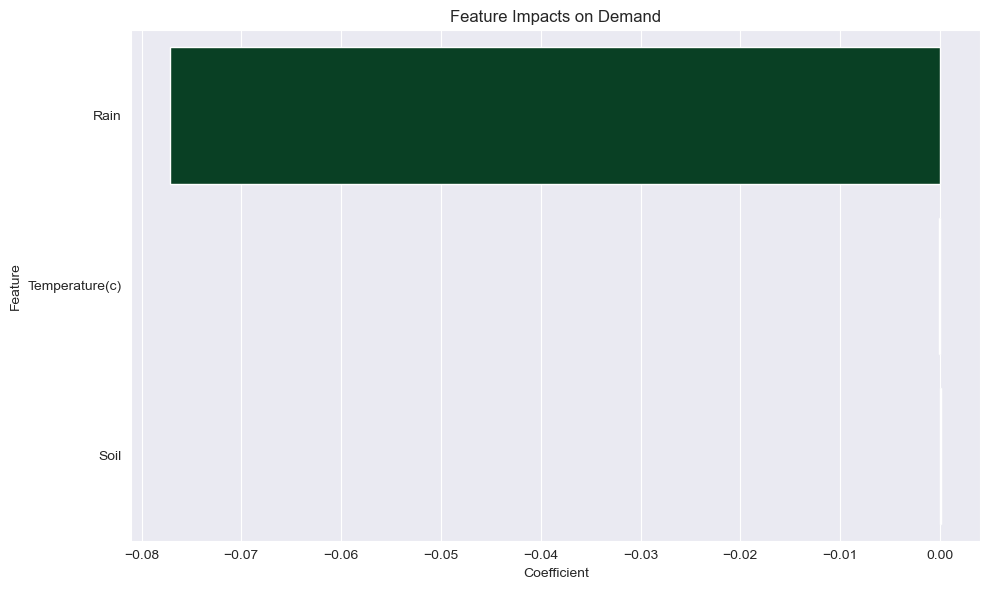

In [232]:
# Visualize feature impacts
plt.figure(figsize=(10, 6))
sns.barplot(x="Coefficient", y="Feature", data=coef_df)
plt.title("Feature Impacts on Demand")
plt.xlabel("Coefficient")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()